# **Project Name**    -



##### **Project Type**    - Netflix Movies & TV shows Clustering -Unsupervised Learning    
##### **Contribution**    - Individual
##### **Submitted by**    - Monika Sahu

# **Project Summary -**

**The main objective of this project is to use unsupervised learning techniques to cluster Netflix movies and TV shows into distinct groups based on their features. This clustering can help in understanding the underlying patterns in the content available on Netflix and assist in content recommendation, catalog management, and market analysis.**


**Dataset:**
The dataset used for this project contains information about Netflix movies and TV shows, including features such as title, genre, director, cast, country, release year, rating, and duration.

**Steps Involved:**

**Data Collection and Preprocessing:**

**Data Cleaning:** Handling missing values, correcting inconsistent data, and removing duplicates.    
**Feature Engineering:** Extracting relevant features such as genre, duration, and rating. Converting categorical data into numerical form using techniques like one-hot encoding.          
**Normalization:** Scaling numerical features to ensure that each feature contributes equally to the distance measurements used in clustering algorithms.     

**Exploratory Data Analysis (EDA):**

Visualizing the distribution of different features.
Analyzing the relationship between various features.
Identifying trends and patterns in the dataset.

**Clustering Techniques:**

**K-Means Clustering:** Applying the K-Means algorithm to cluster the movies and TV shows. Determining the optimal number of clusters using methods like the **Elbow Method and Silhouette Score.**    

**Hierarchical Clustering:** Using hierarchical clustering to group the data. Visualizing the clusters using dendrograms.     

**Cluster Analysis:**

Interpreting the clusters by analyzing the characteristics of each cluster.
Visualizing the clusters using scatter plots, heatmaps, and other visualization techniques.     
Evaluating the clustering performance using metrics like silhouette score.

**Insights and Recommendations:**

Providing insights into the content groups and their characteristics.
Recommending how Netflix can use these clusters for personalized content recommendations, targeted marketing, and improving user experience.


**Tools and Technologies Used:**

**Programming Language:** Python    
**Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn      

**Conclusion:**     

The project successfully demonstrates the application of unsupervised learning techniques to cluster Netflix movies and TV shows. The clustering results provide valuable insights into the content available on Netflix, which can be leveraged for various business applications, including personalized recommendations and content strategy development.




# **GitHub Link -**

# **Problem Statement**


**Netflix's extensive library of movies and TV shows spans various genres, languages, and countries, making it challenging for users to find content that matches their preferences. The objective of this project is to apply unsupervised learning techniques to cluster Netflix's content into meaningful groups based on their features. These clusters will help uncover hidden patterns and relationships within the dataset, enabling Netflix to improve personalized content recommendations, enhance user engagement, and optimize content management strategies.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
#filtering out the warning
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-88b39c7710cd>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_df = pd.read_csv('/content//drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

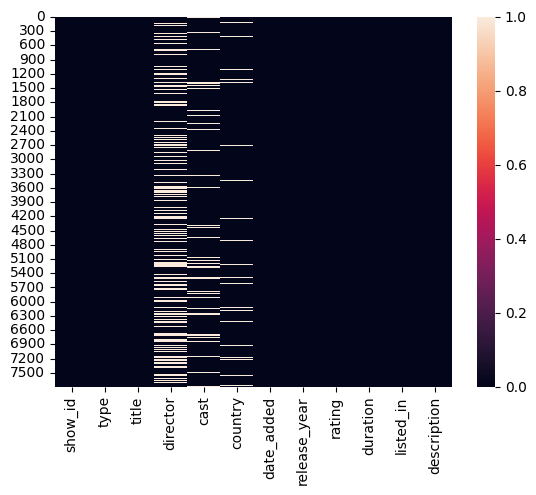

In [ ]:
# Visualizing the missing values
sns.heatmap(netflix_df.isnull())
plt.show()

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows and We can see it contains null values but as comapre to total rows in dataset the most number of null values in Director column like 2300 but we cant drop it so we have to treat the null values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

**Attribute Information**

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

In [ ]:
## Now we treat null values so we replace null values with Unkonwn because these are the important fields so we have to treat them
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['cast'].fillna('Unknown', inplace=True)
netflix_df['country'].fillna('Unknown', inplace=True)

In [ ]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
## Now we see there is very few null values in date added and rating column so we drop them

netflix_df.dropna(inplace=True)

In [ ]:
# Write your code to make your dataset analysis ready.

netflix_df['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

**As we can see our dataset has 5372 Moies and 2398 TV Shows**

In [ ]:
from datetime import datetime
# Apply the function to the 'date_added' column
##First we are coverting date added column string to datetimme
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format="%B %d, %Y", errors='coerce')
##Now we extrat the years
netflix_df['year_added'] = netflix_df['date_added'].dt.year
##Now we extract the months
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [ ]:
##now for the duration column as we have both movies and tvv shows so we divide duration to two column duration numeric that has number like 90 or 2
## and then we have duration type that has min or season

netflix_df[['duration_numeric', 'duration_type']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert 'duration_numeric' to numeric type
netflix_df['duration_numeric'] = netflix_df['duration_numeric'].astype(float)

In [ ]:
## Now we divide this into two parts one for movies and one for TV shows
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie']
netflix_tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show']

### What all manipulations have you done and insights you found?

**We gather the following insights from the dataset:**   

1.There are missing values in direcctor,cast,country and date_added

2.There are 5372 Movies and 2398 TV Shows in the dataset.

3.There are no dupliate values in dataset

**Manupilation We have Done are following**

1.Beause director,cast and country are important columns for us and so we treat the null values by fill them with Unknown.    

2.Because date added and rating have very few null values we drop the null rows.    

3.We extracted month and year from date added column.  

4.We divided duration column into column for furthur analysis.  

5.We divided the dataset into two parts netflix_movies_df and netflix_tv_shows for finding our desired insights.   




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart-1-Distribution of Movies and TV Shows

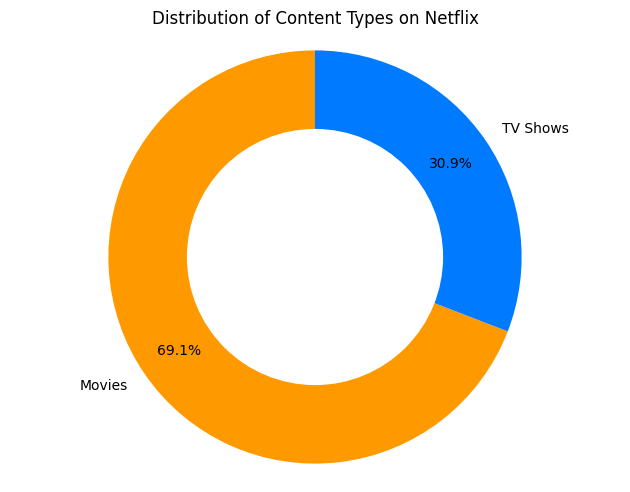

In [ ]:
# Sample data
labels = ['Movies', 'TV Shows']
sizes = [netflix_df['type'].value_counts()['Movie'],
         netflix_df['type'].value_counts()['TV Show']]

colors = [ '#ff9900', '#007bff']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8,colors =colors)

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.62, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title('Distribution of Content Types on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

##### 2. What is/are the insight(s) found from the chart?

TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.

####Chart-2-Trend Over Years

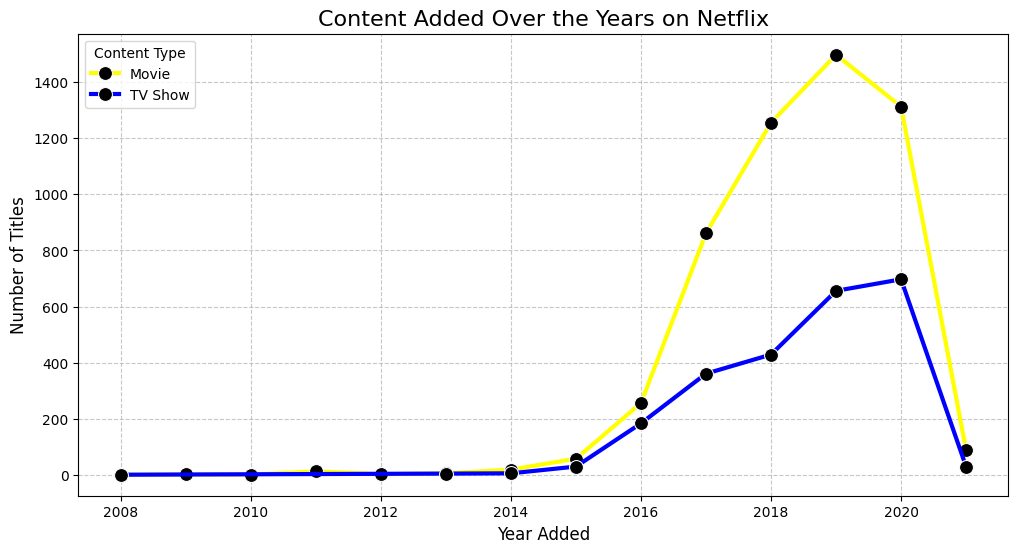

In [ ]:

# Group the data by year and type and count the content
content_over_years = netflix_df.groupby(['year_added', 'type'])['show_id'].count().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_over_years, x='year_added', y='show_id', hue='type', palette={'Movie': 'yellow', 'TV Show': 'blue'}, marker='o', markerfacecolor='black',
             markersize=10, linewidth=3)
plt.title('Content Added Over the Years on Netflix', fontsize=16)  # Increased title fontsize
plt.xlabel('Year Added', fontsize=12)  # Increased label fontsizes
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Added a grid for better readability
plt.legend(title='Content Type', fontsize=10)  # Customized legend
plt.show()

##### 1. Why did you pick the specific chart?

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.

##### 2. What is/are the insight(s) found from the chart?

The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-3-Trend Over Months

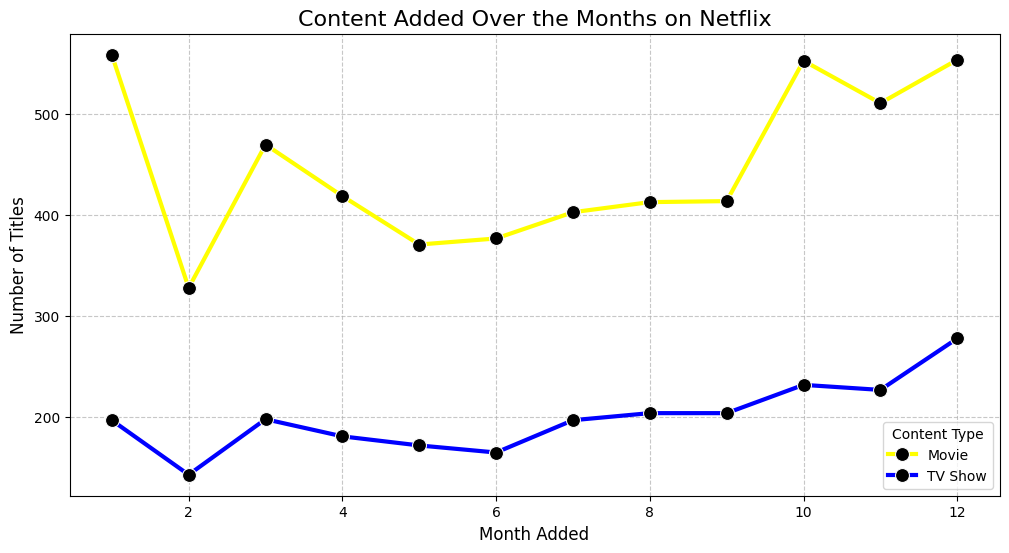

In [ ]:

# Group the data by year and type and count the content
content_over_months = netflix_df.groupby(['month_added', 'type'])['show_id'].count().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_over_months, x='month_added', y='show_id',palette={"Movie":"yellow","TV Show":'blue'},hue='type', marker='o', markerfacecolor='black',
             markersize=10, linewidth=3)
plt.title('Content Added Over the Months on Netflix', fontsize=16)  # Increased title fontsize
plt.xlabel('Month Added', fontsize=12)  # Increased label fontsizes
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Added a grid for better readability
plt.legend(title='Content Type', fontsize=10)  # Customized legend
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4-Top 10 Directiors

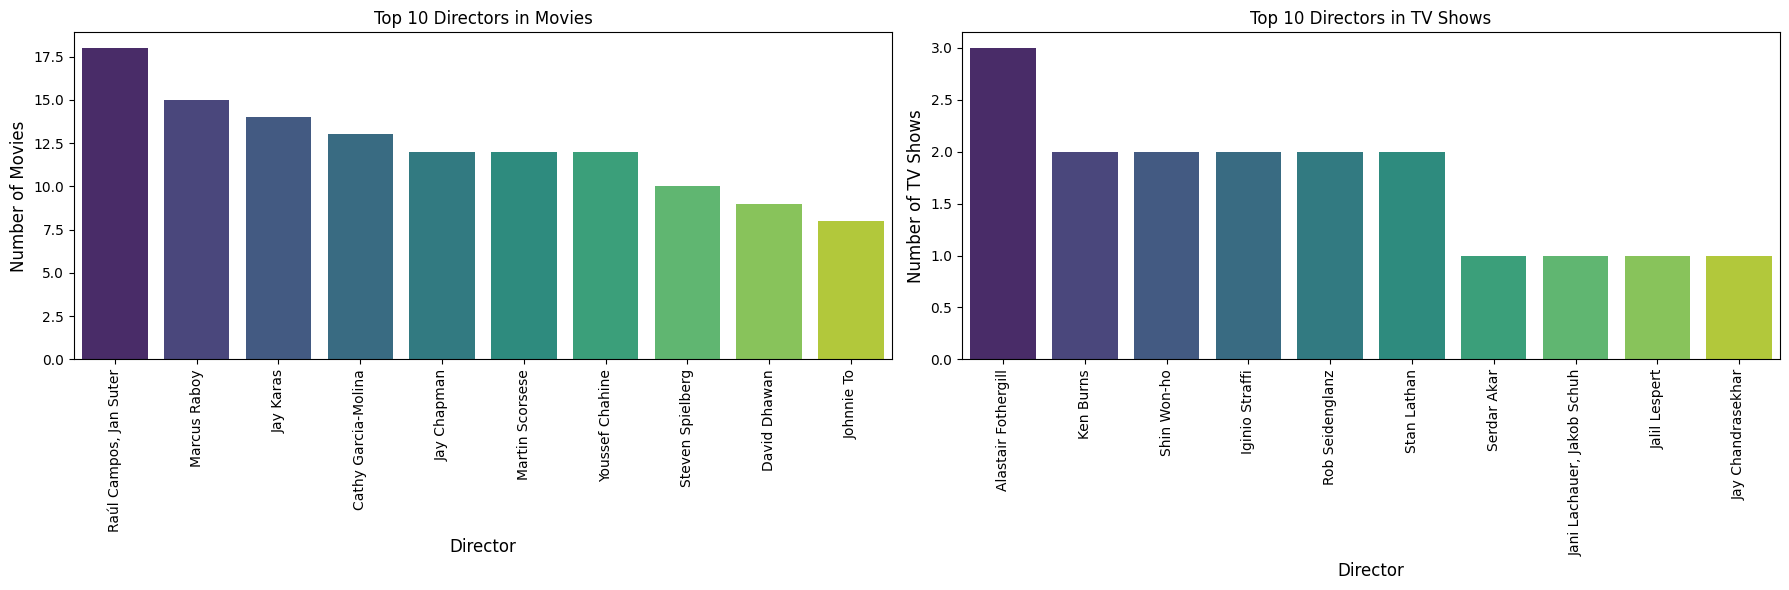

In [ ]:

# Data for top 10 directors for movies
top_10_directors_movies = netflix_movies_df['director'][netflix_movies_df['director'] != 'Unknown'].value_counts().head(10)

# Data for top 10 directors for TV shows
top_10_directors_tv_shows = netflix_tv_shows_df['director'][netflix_tv_shows_df['director'] != 'Unknown'].value_counts().head(10)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 directors in movies
sns.barplot(x=top_10_directors_movies.index, y=top_10_directors_movies, palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Directors in Movies')
axes[0].set_xlabel('Director', fontsize=12)
axes[0].set_ylabel('Number of Movies', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Plot for top 10 directors in TV shows
sns.barplot(x=top_10_directors_tv_shows.index, y=top_10_directors_tv_shows, palette="viridis", ax=axes[1])
axes[1].set_title('Top 10 Directors in TV Shows')
axes[1].set_xlabel('Director', fontsize=12)
axes[1].set_ylabel('Number of TV Shows', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is a suitable choice for visualizing the top 10 directors based on the number of movies they have directed. It allows for easy comparison between the number of movies directed by each director.

##### 2. What is/are the insight(s) found from the chart?

The bar chart provides insights into the most prolific directors in the Netflix movie library. It helps identify the directors who have contributed the most content to the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying the top directors can help Netflix make informed decisions regarding content acquisition and collaboration. They can potentially focus on securing more movies from these popular directors to attract and retain viewers.

#### Chart - 5 - Top-10- Countries

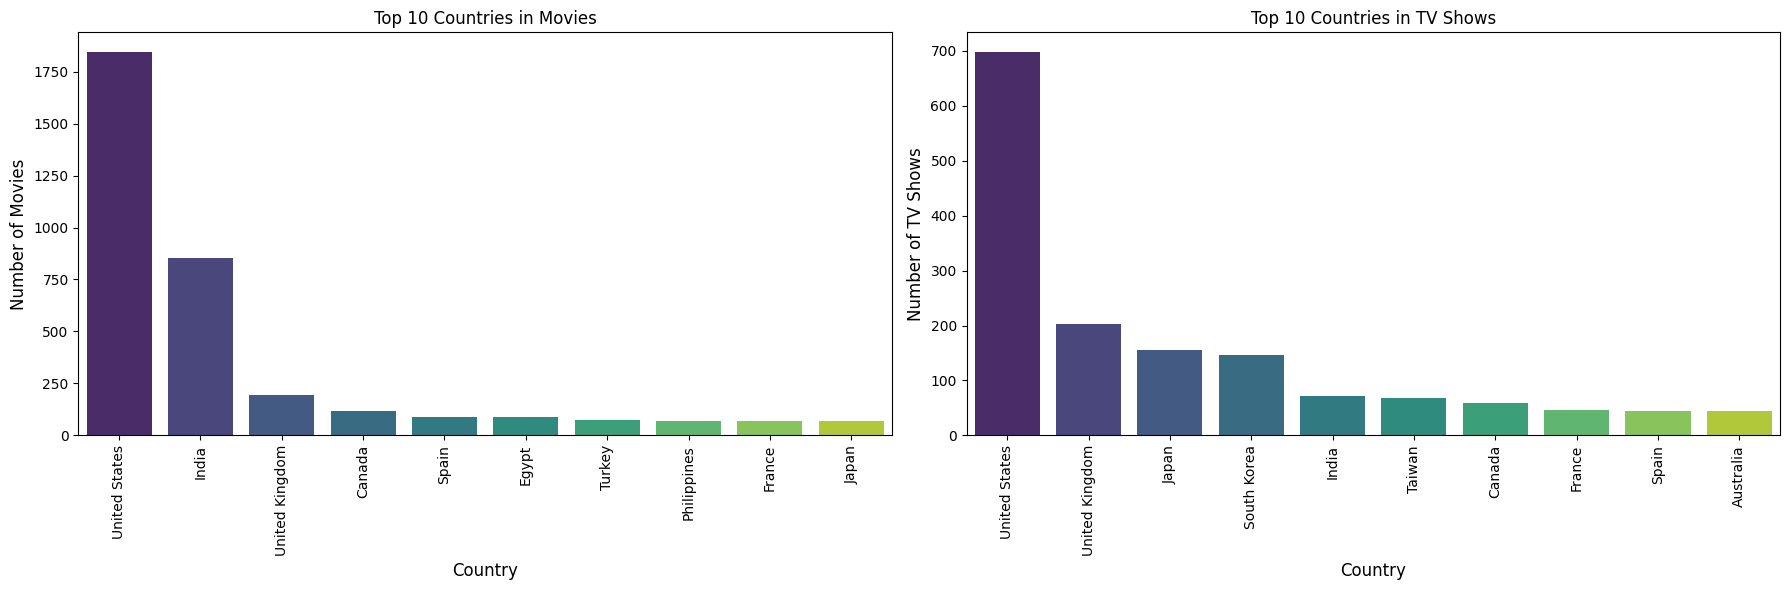

In [ ]:
# Chart - 2 visualization code

# Data for top 10 countries for movies
top_10_countries_movies = netflix_movies_df['country'][netflix_movies_df['country'] != 'Unknown'].value_counts().head(10)

# Data for top 10 countries for TV shows
top_10_countries_tv_shows = netflix_tv_shows_df['country'][netflix_tv_shows_df['country'] != 'Unknown'].value_counts().head(10)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 countries in movies
sns.barplot(x=top_10_countries_movies.index, y=top_10_countries_movies, palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Countries in Movies')
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Number of Movies', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Plot for top 10 countries in TV shows
sns.barplot(x=top_10_countries_tv_shows.index, y=top_10_countries_tv_shows, palette="viridis", ax=axes[1])
axes[1].set_title('Top 10 Countries in TV Shows')
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Number of TV Shows', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?


I picked bar charts because they effectively display the count of movies and TV shows from the top 10 countries, allowing for easy comparison and clear visualization of the data distribution across different countries.


##### 2. What is/are the insight(s) found from the chart?

I found out that in Movies we can see USA in 1st position but India is on 2nd position that mean India is our also top most priority and In TV Shows we can see USA is first and UK is second.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,these insights can help us As we can see USA is top performing country but we need to expand in other countries.We can see in India we have at least good Movies quantity but we have to improve more to attract more subs and we also see in there are very less tv shows in India we have to increase more.because India is a big market that's why I am highlighting it because we can make more money there and yes we also have to look into other countries too.

#### Chart - 7 - Top-10-Gneres

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming netflix_movies_df and netflix_tv_shows_df are DataFrames containing movies and TV shows data respectively

# Data for top 10 genres for movies
top_10_genre_movies = netflix_movies_df['listed_in'].value_counts().head(10)

# Data for top 10 genres for TV shows
top_10_genre_tv_shows = netflix_tv_shows_df['listed_in'].value_counts().head(10)

# Creating the pie chart for movies
fig_movies = px.pie(values=top_10_genre_movies.values, names=top_10_genre_movies.index,
                    title='Top 10 Genres in Movies on Netflix',
                    color_discrete_sequence=px.colors.qualitative.Set1)

# Updating layout for movies pie chart
fig_movies.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)

fig_movies.update_layout(height=600, width=900, title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                         font=dict(size=12, color='#000000'),
                         hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"),
                         showlegend=False,
                         plot_bgcolor='#fafafa',
                         paper_bgcolor='#fafafa',
                         margin=dict(t=100, b=30, l=0, r=0))

# Creating the pie chart for TV shows
fig_tv_shows = px.pie(values=top_10_genre_tv_shows.values, names=top_10_genre_tv_shows.index,
                      title='Top 10 Genres in TV Shows on Netflix',
                      color_discrete_sequence=px.colors.qualitative.Set2)

# Updating layout for TV shows pie chart
fig_tv_shows.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)

fig_tv_shows.update_layout(height=600, width=900, title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                           font=dict(size=12, color='#000000'),
                           hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"),
                           showlegend=False,
                           plot_bgcolor='#fafafa',
                           paper_bgcolor='#fafafa',
                           margin=dict(t=100, b=30, l=0, r=0))

# Display the pie charts for movies and TV shows
fig_movies.show()
fig_tv_shows.show()


##### 1. Why did you pick the specific chart?

I pick this chart because I want to show the Distribution of genres.

##### 2. What is/are the insight(s) found from the chart?

I found out that in TV shows there is 20% shows are Kid's TV and in Movies we can see there are three major genres Documentries,Stand-up Comedy and Drama.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,these insights can help us to create a positive business impact.As we can see in TV Shows we have 20% kid's TV so we have to increase some other genres tv shows that attract the teen and adults to the platform so the subs and profit increases and for movies we can increase other genres too so we can see how they are performing

#### Chart - 8 - Distribution of Runtime and Seasons

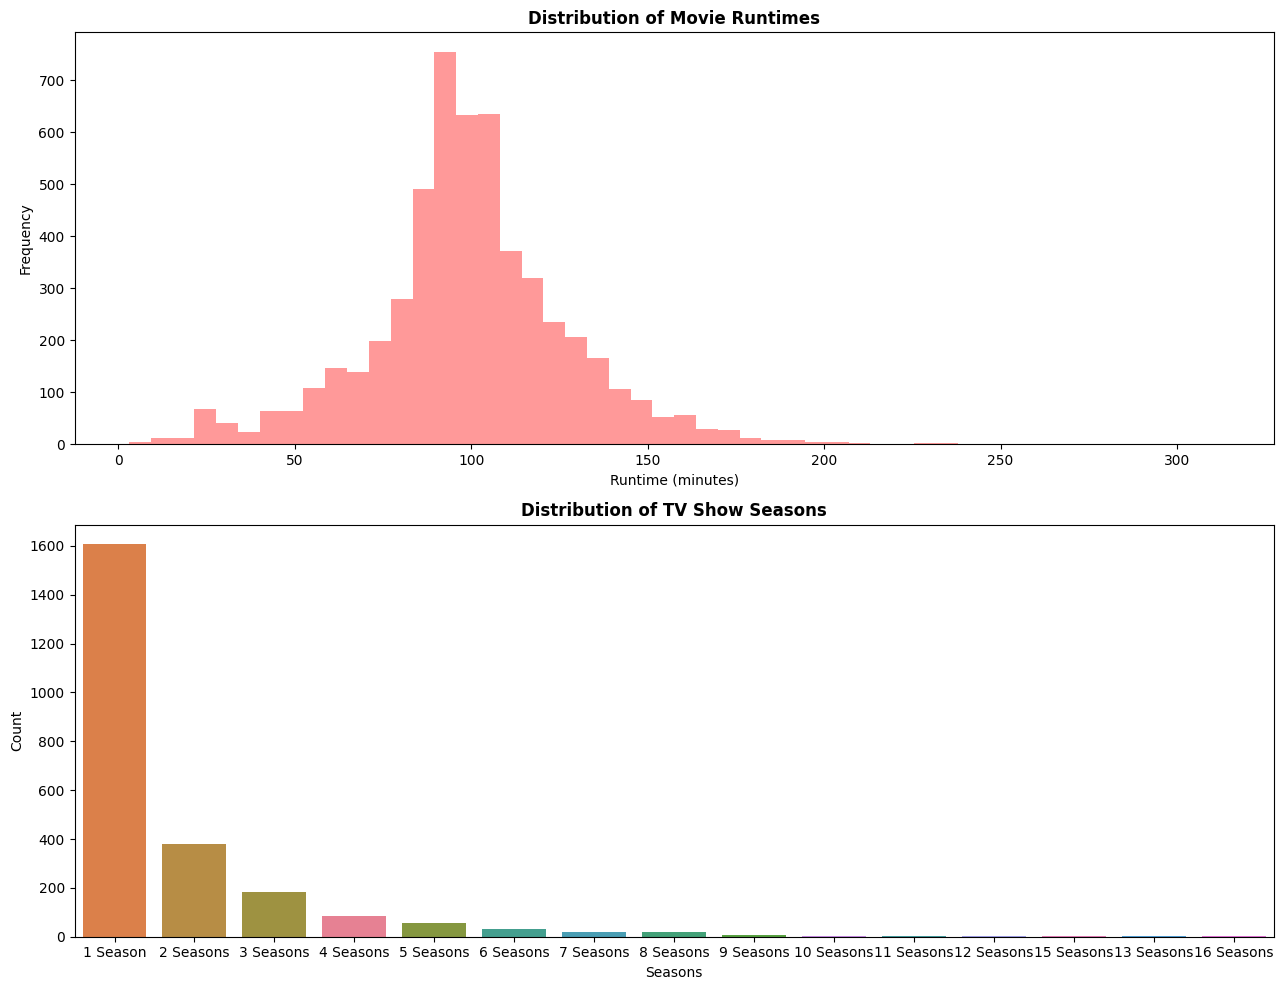

In [ ]:

# Assuming netflix_movies_df and netflix_tv_shows_df are your DataFrames

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 10))  # Create a subplot with 1 row and 2 columns

# Plot movie runtime distribution
sns.distplot(netflix_movies_df['duration_numeric'], kde=False, color='red', ax=ax1)
ax1.set_title('Distribution of Movie Runtimes', fontweight='bold')
ax1.set_xlabel('Runtime (minutes)')
ax1.set_ylabel('Frequency')

# Plot TV show season distribution
sns.countplot(x=netflix_tv_shows_df['duration'], data=netflix_tv_shows_df, order=netflix_tv_shows_df['duration'].value_counts().index,
              hue=netflix_tv_shows_df['duration'], ax=ax2)
ax2.set_title('Distribution of TV Show Seasons', fontweight='bold')
ax2.set_xlabel('Seasons')
ax2.set_ylabel('Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


##### 1. Why did you pick the specific chart?

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.     

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### 2. What is/are the insight(s) found from the chart?

1.The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.        

2.From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9- Distribution of Netflix Originals and Others

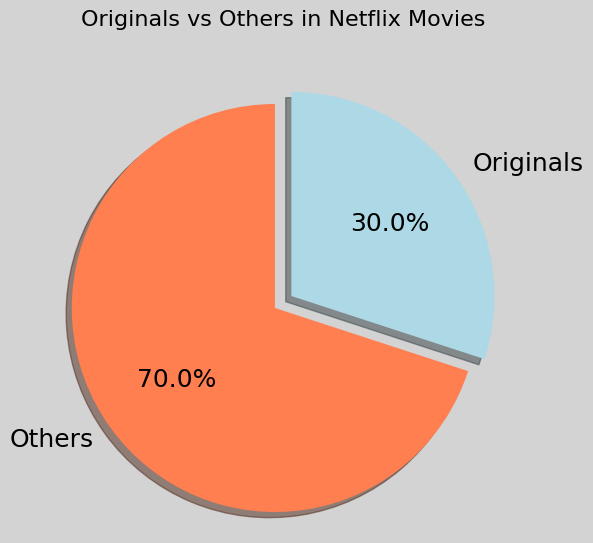

In [ ]:
netflix_movies_df['originals'] = np.where(netflix_movies_df['release_year'] == netflix_movies_df['year_added'], 'Yes', 'No')
# Create colors with a clear contrast
colors = ['coral', 'lightblue']

# Create figure and adjust background color
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('lightgray')  # Set a subtle background

# Prepare explode values to emphasize Originals slice
explode = (0, 0.1)  # Explode Originals slice slightly

# Create the pie chart with customizations
wedges, texts, autotexts = ax.pie(netflix_movies_df['originals'].value_counts(), explode=explode, autopct='%.1f%%',
                                  labels=['Others', 'Originals'], shadow=True, startangle=90,
                                  textprops={'color': "black", 'fontsize': 18}, colors=colors)

# Adjust text positioning to avoid overlapping slices
plt.setp(autotexts, bbox=dict(facecolor='none', edgecolor='none', pad=5.0))

# Add a title and center it
ax.set_title('Originals vs Others in Netflix Movies', fontsize=16, y=1.08)
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

The pie plot is a suitable choice for visualizing the distribution of categorical data, such as the proportion of "originals" and "others" in this case. It allows you to see the relative sizes of each category as a portion of the whole.

##### 2. What is/are the insight(s) found from the chart?

Out of the movies available on Netflix, 30% are Netflix originals, while the remaining 70% are movies that were released earlier through different distribution channels and subsequently added to the Netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gaining insights can indeed help create a positive business impact. By understanding the distribution of movies on Netflix, such as the proportion of Netflix originals versus non-originals, the streaming service can make informed decisions about content acquisition and production.

#### Chart - 10- Top-10-Actors



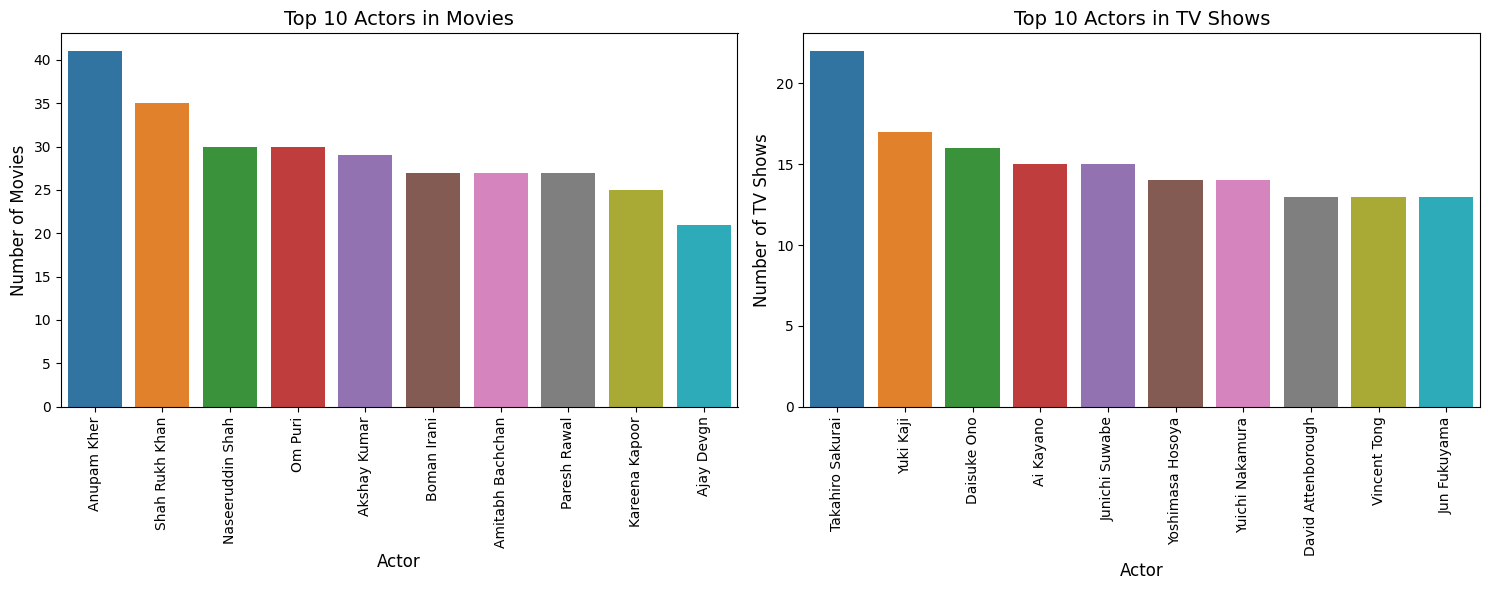

In [ ]:

# Prepare data for movies and TV shows
actors_series_movies = netflix_movies_df['cast'][netflix_movies_df['cast'] != "Unknown"].str.split(', ').explode().reset_index(drop=True)
actor_counts_movies = actors_series_movies.value_counts().sort_values(ascending=False).head(10)

actors_series_tv_shows = netflix_tv_shows_df['cast'][netflix_tv_shows_df['cast'] != "Unknown"].str.split(', ').explode().reset_index(drop=True)
actor_counts_tv_shows = actors_series_tv_shows.value_counts().sort_values(ascending=False).head(10)

# Create figure and subplots with a balanced aspect ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot top actors in movies
sns.barplot(x=actor_counts_movies.index, y=actor_counts_movies, ax=ax1, hue=actor_counts_movies.index)
ax1.set_title('Top 10 Actors in Movies', fontsize=14)
ax1.set_xlabel('Actor', fontsize=12)
ax1.set_ylabel('Number of Movies', fontsize=12)
ax1.tick_params(axis='x', rotation=90, labelsize=10)  # Rotate and adjust x-axis labels

# Plot top actors in TV shows
sns.barplot(x=actor_counts_tv_shows.index, y=actor_counts_tv_shows, ax=ax2, hue=actor_counts_tv_shows.index)
ax2.set_title('Top 10 Actors in TV Shows', fontsize=14)
ax2.set_xlabel('Actor', fontsize=12)
ax2.set_ylabel('Number of TV Shows', fontsize=12)
ax2.tick_params(axis='x', rotation=90, labelsize=10)  # Rotate and adjust x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

The bar chart is more good is categorial variable distribution so as we see actor as category this is the fitted chart for this.

##### 2. What is/are the insight(s) found from the chart?

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,It can we can see more movies are from Anupam Kher so we hae to inrease other famous star movies so thier fans will attract and this we do with tv shows as well.

#### Chart - 11-Countries and thier content

In [ ]:
# Create subset of dataset with required data.
conuntryVSgenre = netflix_df[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict


In [ ]:

conuntryVSgenre

country  \
0                                                Brazil   
1                                                Mexico   
2                                             Singapore   
3                                         United States   
4                                         United States   
...                                                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...   
7783                                              India   
7784                                            Unknown   
7785                                          Australia   
7786              United Kingdom, Canada, United States   

                                              listed_in  
0     International TV Shows, TV Dramas, TV Sci-Fi &...  
1                          Dramas, International Movies  
2                   Horror Movies, International Movies  
3     Action & Adventure, Independent Movies, Sci-Fi...  
4                                                Dramas  
...                                                 ...  
7782                       Dramas, International Movies  
7783     Dramas, International Movies, Music & Musicals  
7784  Documentaries, International Movies, Music & M...  
7785                 International TV Shows, Reality TV  
7786                    Documentaries, Music & Musicals  

[7770 rows x 2 columns]

In [ ]:
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)


In [ ]:

country_genre_count_df

Genre  United States  India  United Kingdom  \
0             Action & Adventure            196  124.0            19.0   
1             Independent Movies            284  129.0            24.0   
2               Sci-Fi & Fantasy            101   10.0             6.0   
3                         Dramas            517  589.0            37.0   
4                      Thrillers            168   85.0            15.0   
5                  Documentaries            381   18.0            79.0   
6                     Reality TV            103    3.0            32.0   
7                    TV Comedies            214   25.0            36.0   
8                       Comedies            458  293.0            31.0   
9                  Sports Movies             82   15.0            13.0   
10               Romantic Movies            147  111.0             3.0   
11                    Docuseries            162    7.0            79.0   
12           Science & Nature TV             38    NaN            21.0   
13                        Movies             19    NaN             2.0   
14                 Horror Movies            126   31.0             9.0   
15                Crime TV Shows            105    8.0            36.0   
16                     TV Dramas            181   24.0            20.0   
17                  TV Mysteries             37    3.0             1.0   
18              Music & Musicals            100   90.0            13.0   
19                  LGBTQ Movies             52    2.0             3.0   
20                      Kids' TV            132   10.0            18.0   
21         TV Action & Adventure             66    5.0             3.0   
22           TV Sci-Fi & Fantasy             41    3.0             1.0   
23              British TV Shows              4    1.0           186.0   
24      Children & Family Movies            252   16.0             7.0   
25                      TV Shows              3    2.0             NaN   
26  Stand-Up Comedy & Talk Shows             33    3.0             1.0   
27                   Cult Movies             32    5.0             3.0   
28        International TV Shows             25   59.0           102.0   
29               Stand-Up Comedy            211    6.0            20.0   
30          International Movies             17  785.0            61.0   
31                Classic Movies             53   11.0             3.0   
32                 Teen TV Shows             29    1.0             NaN   
33                     TV Horror             27    7.0             1.0   
34                  TV Thrillers             21    3.0             1.0   
35          Faith & Spirituality             28    3.0             NaN   
36             Classic & Cult TV             12    NaN             6.0   
37             Romantic TV Shows             33    9.0             9.0   
38                  Anime Series              5    NaN             NaN   
39     Spanish-Language TV Shows             11    NaN             NaN   
40               Korean TV Shows              1    NaN             NaN   
41                Anime Features              1    NaN             NaN   

    Canada  Japan  France  South Korea  Spain  Mexico  Australia  
0     12.0   42.0    12.0         13.0    3.0     2.0        3.0  
1     15.0    NaN     8.0          NaN   11.0    12.0        4.0  
2      5.0    7.0     1.0          3.0    2.0     2.0        2.0  
3     21.0    9.0    29.0         18.0   35.0    22.0       16.0  
4     11.0    1.0     3.0         12.0   18.0     1.0        4.0  
5     20.0    NaN    22.0          1.0   16.0    10.0        5.0  
6      9.0    6.0     2.0          3.0    2.0     NaN       11.0  
7     14.0    6.0    14.0         13.0    5.0     3.0       11.0  
8     38.0    NaN    17.0          5.0   31.0    16.0        5.0  
9      6.0    NaN     7.0          NaN    3.0     1.0        4.0  
10    15.0    3.0     4.0          1.0    9.0     6.0        NaN  
11     8.0    1.0     5.0          NaN  

In [ ]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

##### 1. Why did you pick the specific chart?

It is suitable for showing the distribution of different genres across multiple countries. Each pie chart represents a country, and the slices of the pie represent different genres. The size of each slice indicates the proportion of content in that genre for a particular country. This allows for easy comparison of genre distribution across countries in a visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

Action & Adventure and Dramas are the most prevalent genres across all countries. They have the highest values in most countries, indicating their popularity.The United States has a diverse content offering across multiple genres, with a strong presence in Action & Adventure, Dramas, Comedies, and Documentaries.

India has a significant focus on Independent Movies and Dramas, with relatively fewer offerings in other genres.

The United Kingdom has a good balance between Drama, International TV Shows, and Documentaries.

Australia's content offering is diverse, with a relatively balanced distribution across various genres such as Dramas, Comedies, International TV Shows, and Documentaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact in the following ways:

**1-Targeted Content Strategy:** By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

**2-Market Expansion:**The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

**3-Content Localization:** Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

#### Chart - 12 - Age Ratings Distribution

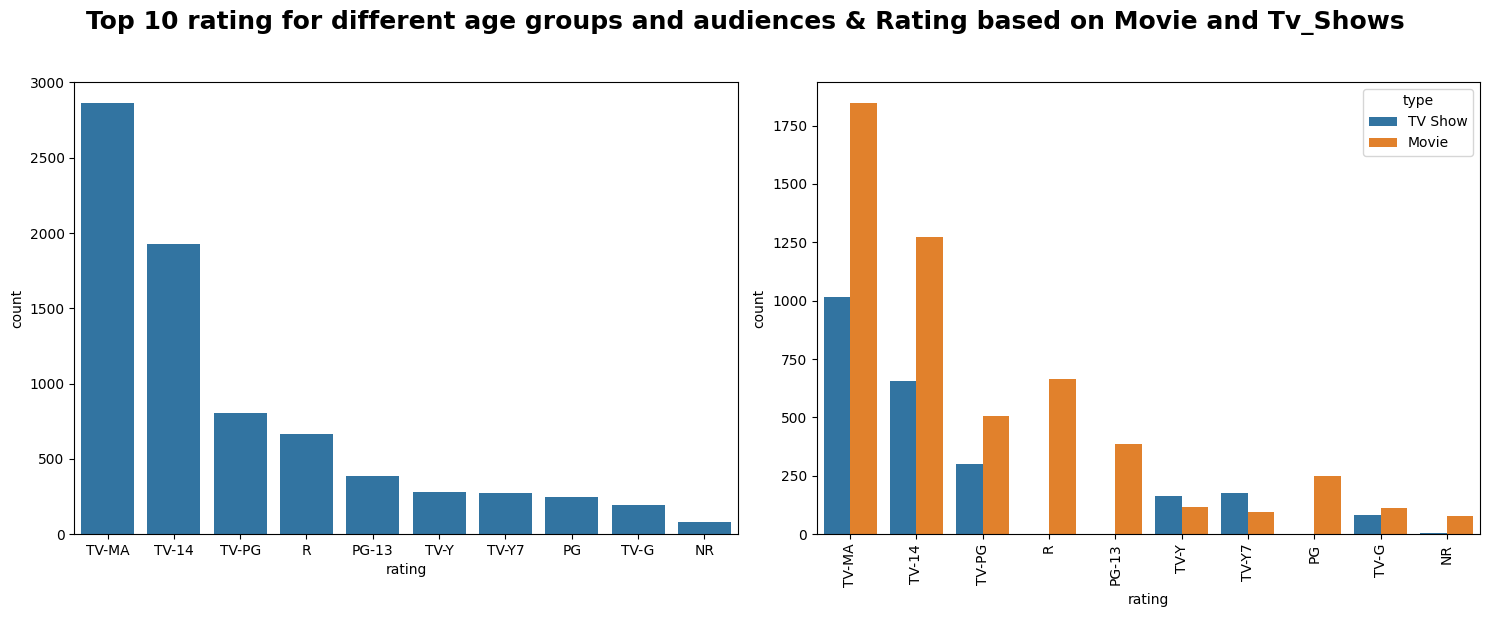

In [ ]:

fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Variables Description- Rating**

**TV-Y**: This rating means that the content is appropriate for all children. It is aimed at children aged 2-6 and may include educational programming.

**TV-Y7**: This rating means that the content is appropriate for children aged 7 and up. It may contain mild violence, comic mischief, or scary content that may not be suitable for younger children.

**TV-Y7-FV:** This rating means that the content is appropriate for children aged 7 and up, but may contain more intense violence. The "FV" stands for "fantasy violence".

**TV-G:** This rating means that the content is appropriate for all ages. It may contain mild language or violence, but nothing too intense.

**TV-PG:** This rating means that parental guidance is suggested. The content may contain material that parents might find inappropriate for younger children. It may include mild to moderate language, violence, or suggestive content.

**TV-14:** This rating means that the content is appropriate for viewers aged 14 and up. It may include intense violence, strong language, or sexual situations.

**TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language.

**G**- This rating means that the content is appropriate for all ages. It is usually intended for young children and may include animated or family-friendly content.

**PG:** This rating means that parental guidance is suggested. The content may include mild violence, language, or suggestive themes.

**PG-13:**This rating means that the content is appropriate for teens aged 13 and up. It may include intense violence, language, or suggestive content.

**R:** This rating means that the content is intended for adults. It may include graphic violence, strong language, or nudity.

**NC-17:** This rating means that the content is intended for mature audiences only and may contain explicit sexual content or violence that is not suitable for minors.

**NR:** This rating means that no rating has been assigned yet or that the content is not rated by a particular board.



##### 1. Why did you pick the specific chart?

The chosen chart combination of two count plots allows for both univariate and bivariate analysis. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

TV-MA: This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is TV-MA, which applies to both movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that **TV-MA** is the most common rating for both movies and TV shows can inform content strategies, audience targeting, programming decisions, and content diversity to drive positive business impact in terms of increased viewership and customer satisfaction

#### Chart - 13- Corelation Heatap

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)



In [ ]:
# Preparing data for heatmap
netflix_df['count'] = 1
netflix_df1 = netflix_df[netflix_df['country'] != 'Unknown']
data = netflix_df1.groupby('country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_df1.loc[netflix_df1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.512626       0.502357  
Kids            0.027322  0.022388        0.093434       0.073449  
Older Kids      0.120219  0.044776        0.204545       0.187353  
Teens           0.382514  0.097015        0.189394       0.236842

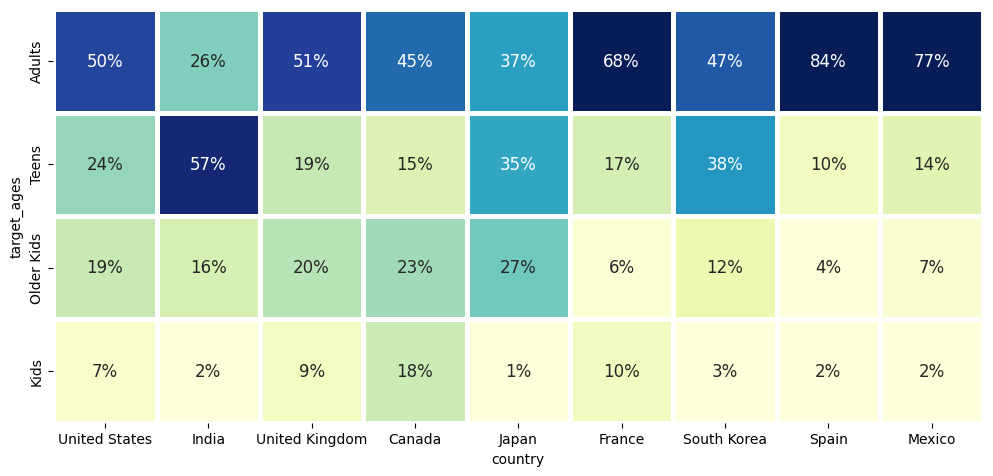

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

**1.France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

**2.India-** It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

**3.United Kingdom -**It has a relatively high level of interest among adults, with 51% expressing interest.

**4.Mexico-**Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

**5.South Korea , United States-** Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

**6.Japan-** It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

**7.Canada-** It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

#### Chart-14 - Corelation Heatmap

In [ ]:
netflix_df['count'] = 1
data1 = netflix_df.groupby('listed_in')[['count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']


In [ ]:
data1

0                                       Documentaries
1                                     Stand-Up Comedy
2                        Dramas, International Movies
3              Comedies, Dramas, International Movies
4    Dramas, Independent Movies, International Movies
5                                            Kids' TV
6                            Children & Family Movies
7                 Documentaries, International Movies
8                  Children & Family Movies, Comedies
9                      Comedies, International Movies
Name: listed_in, dtype: object

In [ ]:
df_heatmap1 = netflix_df.loc[netflix_df['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in    Children & Family Movies  Children & Family Movies, Comedies  \
target_ages                                                                 
Adults                       0.000000                            0.000000   
Kids                         0.564972                            0.177515   
Older Kids                   0.435028                            0.816568   
Teens                        0.000000                            0.005917   

listed_in    Comedies, Dramas, International Movies  \
target_ages                                           
Adults                                     0.345679   
Kids                                       0.004115   
Older Kids                                 0.123457   
Teens                                      0.526749   

listed_in    Comedies, International Movies  Documentaries  \
target_ages                                                  
Adults                             0.484472       0.386228   
Kids                               0.012422       0.059880   
Older Kids                         0.099379       0.254491   
Teens                              0.403727       0.299401   

listed_in    Documentaries, International Movies  \
target_ages                                        
Adults                                  0.377907   
Kids                                    0.063953   
Older Kids                              0.238372   
Teens                                   0.319767   

listed_in    Dramas, Independent Movies, International Movies  \
target_ages                                                     
Adults                                               0.660465   
Kids                                                 0.004651   
Older Kids                                           0.083721   
Teens                                                0.251163   

listed_in    Dramas, International Movies  Kids' TV  Stand-Up Comedy  
target_ages                                                           
Adults                           0.468750  0.000000         0.894081  
Kids                             0.006250  0.563725         0.000000  
Older Kids                       0.109375  0.436275         0.018692  
Teens                            0.415625  0.000000         0.087227

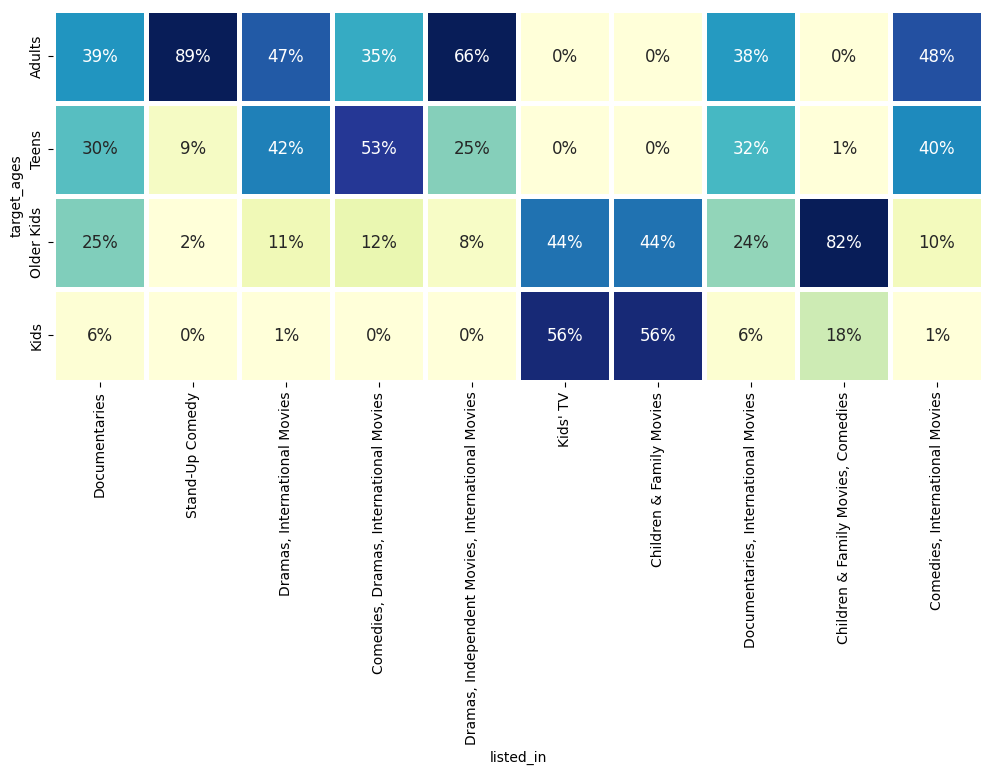

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### 2. What is/are the insight(s) found from the chart?

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

#### Chart - 15 - Funnel Chart

In [ ]:
# Correlation Heatmap visualization code
country_count=netflix_df['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries


count
country              
United States    2546
India             923
Unknown           505
United Kingdom    396
Japan             224
South Korea       183
Canada            177
Spain             134
France            115
Egypt             101
Mexico            100

In [ ]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()



##### 1. Why did you pick the specific chart?

Funnel charts are often used to represent a gradual reduction in data as it moves through different stages or categories. In this case, the chart visualizes the number of movies in the top 10 countries, showcasing the decreasing count from the top to the bottom.

##### 2. What is/are the insight(s) found from the chart?

The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/Tv shows market.

##### 3.Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

**1-Talent Acquisition :** This insight can be valuable for businesses looking to recruit skilled individuals in areas such as filmmaking, writing, acting, or technical roles.

**2-Market Expansion:**The insights reveal countries with a significant number of movies, such as the United States and India. This information can guide businesses in expanding their operations and targeting these markets for distribution, marketing, and partnerships.

## ***5. Hypothesis Testing***

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_df.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  ...  \
0 2020-08-14          2020  TV-MA  4 Seasons  ...   
1 2016-12-23          2016  TV-MA     93 min  ...   
2 2018-12-20          2011      R     78 min  ...   
3 2017-11-16          2009  PG-13     80 min  ...   
4 2020-01-01          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  In a future where the elite inhabit an island ...       2020            8   
1  After a devastating earthquake hits Mexico Cit...       2016           12   
2  When an army recruit is found dead, his fellow...       2018           12   
3  In a postapocalyptic world, rag-doll robots hi...       2017           11   
4  A brilliant group of students become card-coun...       2020            1   

   duration_numeric  duration_type target_ages count  \
0               4.0        Seasons      Adults     1   
1              93.0            min      Adults     1   
2              78.0            min      Adults     1   
3              80.0            min       Teens     1   
4             123.0            min       Teens     1   

                                          clustering  \
0  Unknown João Miguel, Bianca Comparato, Michel ...   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...   
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...   
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...   

                                          Clean_Text cluster_number  
0  unknown joão miguel bianca comparato michel go...              1  
1  jorge michel grau demián bichir héctor bonilla...             12  
2  gilbert chan tedd chan stella chung henley hii...             12  
3  shane acker elijah wood john reilly jennifer c...             14  
4  robert luketic jim sturgess kevin spacey kate ...              4  

[5 rows x 21 columns]

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)

## lets see uique target ages

netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'],categories=['Kids','Older Kids','Teens','Adults'])

In [ ]:
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  ...  \
0 2020-08-14          2020  TV-MA  4 Seasons  ...   
1 2016-12-23          2016  TV-MA     93 min  ...   
2 2018-12-20          2011      R     78 min  ...   
3 2017-11-16          2009  PG-13     80 min  ...   
4 2020-01-01          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  In a future where the elite inhabit an island ...       2020            8   
1  After a devastating earthquake hits Mexico Cit...       2016           12   
2  When an army recruit is found dead, his fellow...       2018           12   
3  In a postapocalyptic world, rag-doll robots hi...       2017           11   
4  A brilliant group of students become card-coun...       2020            1   

   duration_numeric  duration_type target_ages count  \
0               4.0        Seasons      Adults     1   
1              93.0            min      Adults     1   
2              78.0            min      Adults     1   
3              80.0            min       Teens     1   
4             123.0            min       Teens     1   

                                          clustering  \
0  Unknown João Miguel, Bianca Comparato, Michel ...   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...   
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...   
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...   

                                          Clean_Text cluster_number  
0  unknown joão miguel bianca comparato michel go...              1  
1  jorge michel grau demián bichir héctor bonilla...             12  
2  gilbert chan tedd chan stella chung henley hii...             12  
3  shane acker elijah wood john reilly jennifer c...             14  
4  robert luketic jim sturgess kevin spacey kate ...              4  

[5 rows x 21 columns]

In [ ]:
group_by = netflix_hypothesis[['duration_numeric','target_ages']].groupby(by='target_ages')

group_mean = group_by.mean().reset_index()
group_mean

target_ages  duration_numeric
0        Kids         35.550781
1  Older Kids         59.717408
2       Teens         79.355229
3      Adults         70.984794

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As we see early most of the runtime of movies vary between 50-150 so we are running this hypothesis testing on movies runtime

HO : The average run time is less than 90 min      
H1 : The average runtime is greater than 90 min

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Hypothesized mean runtime
hypothesized_mean = 90

# Perform t-test
t_stat, p_value = stats.ttest_1samp(netflix_movies_df['duration_numeric'], hypothesized_mean)

if t_stat > 0:
    p_value /= 2
else:
    p_value = 1 - (p_value / 2)

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average runtime is significantly greater than 90 minutes.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average runtime is greater than 90 minutes.")


T-statistic: 23.974827421889476, P-value: 4.627220827742592e-121
Reject the null hypothesis: The average runtime is significantly greater than 90 minutes.


##### Which statistical test have you done to obtain P-Value?

I used one tail T test

##### Why did you choose the specific statistical test?

I used this beause I want two know that the moies average run time is greater than 90 or not so we can say that movies should be 90 min more be profitable or not


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As we see above that kids and older kids have runtime between 30-60 min for movies so we are doing hypothesis testing.

HO : The average run time for children are less than 60 min    
H1 : The average runtime for children are more than 60 min

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Hypothesized mean runtime
hypothesized_mean = 60

group_by_children = netflix_hypothesis[(netflix_hypothesis['target_ages'] == 'Kids') | (netflix_hypothesis['target_ages'] == 'Older Kids')]
# Perform t-test
t_stat, p_value = stats.ttest_1samp(group_by_children['duration_numeric'], hypothesized_mean)

if t_stat > 0:
    p_value /= 2
else:
    p_value = 1 - (p_value / 2)

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average runtime is significantly greater than 60 minutes.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average runtime is greater than 60 minutes.")


T-statistic: -6.193573406417919, P-value: 0.9999999996380649
Fail to reject the null hypothesis: There is no significant evidence that the average runtime is greater than 60 minutes.


##### Which statistical test have you done to obtain P-Value?

I used T test

##### Why did you choose the specific statistical test?

Bacause I want to do the 1 tail test that'why I used this

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Combining all the clustering attributes into a single column
netflix_df['clustering'] = (netflix_df['director'] + ' ' + netflix_df['cast'] +' ' +
                                 netflix_df['country'] +' ' + netflix_df['listed_in'] +
                                 ' ' + netflix_df['description'])

In [ ]:
netflix_df['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe Unknown United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

## **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [ ]:
netflix_df['Clean_Text'] = netflix_df['clustering'].apply(transform_text)

## **Text Vactorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

**Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:**

**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
bag_of_words = netflix_df['Clean_Text']

tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_features=20000)
tfidf_vectorizer.fit(bag_of_words)

TfidfVectorizer(max_features=20000, stop_words='english')

In [ ]:
X = tfidf_vectorizer.transform(bag_of_words)

In [ ]:
print(X.shape)

(7770, 20000)


In [ ]:
tfidf_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şimşek', 'şinasi', 'şükrü'], dtype=object)

## **Dimensionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [ ]:
from sklearn.decomposition import PCA
transformer = PCA()
transformer.fit(X.toarray())

PCA()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

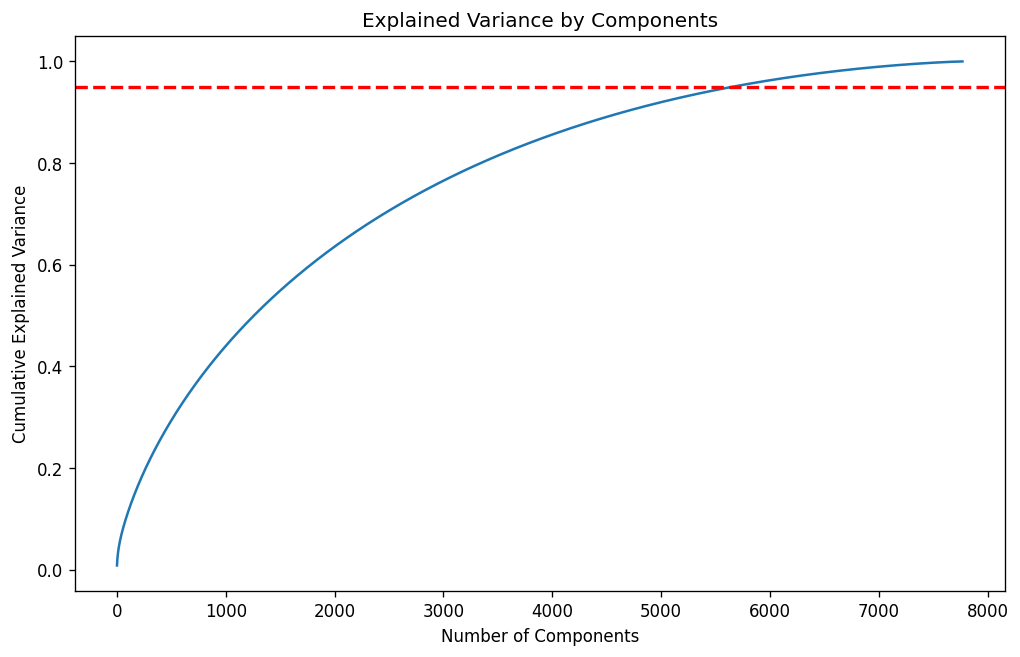

In [ ]:
plt.figure(figsize=(10, 6),dpi = 120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth = 2,label = "95% Explained Variance")
plt.show()


**The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.**

In [ ]:
from sklearn.decomposition import PCA
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())

print(X_transformed.shape)

(7770, 5652)


## ***7. ML Model Implementation***

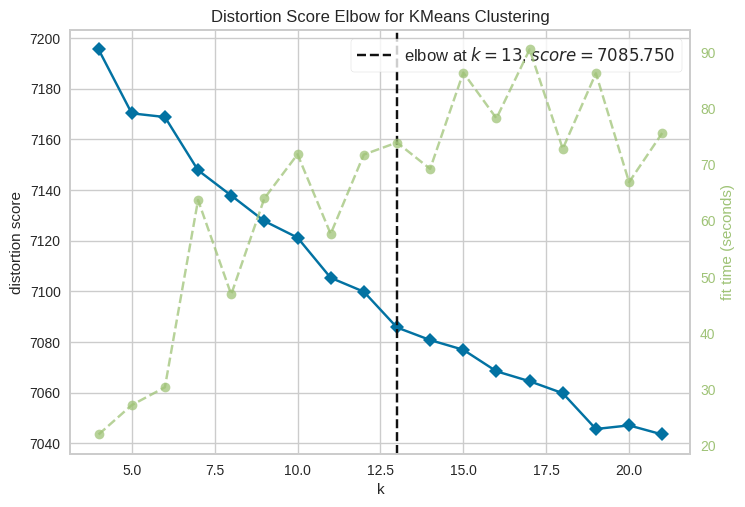

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


model = KMeans(random_state = 5)
visualizer = KElbowVisualizer(model, k=(4,22),metrics = 'silohouette',timing = False,locate_elbow = True)
visualizer.fit(X_transformed)
visualizer.show()

**The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 13 clusters .**

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples

def silhouette_analysis(n):
  for n_clusters in range(2, n):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    prdes = km.fit_predict(X_transformed)
    centers = km.cluster_centers_
    score = silhouette_score(X_transformed, prdes,metric = 'euclidean')
    print(f"Silhouette score for {n_clusters} clusters: {score}")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X_transformed)
    visualizer.poof()

Silhouette score for 2 clusters: 0.004915254671073327


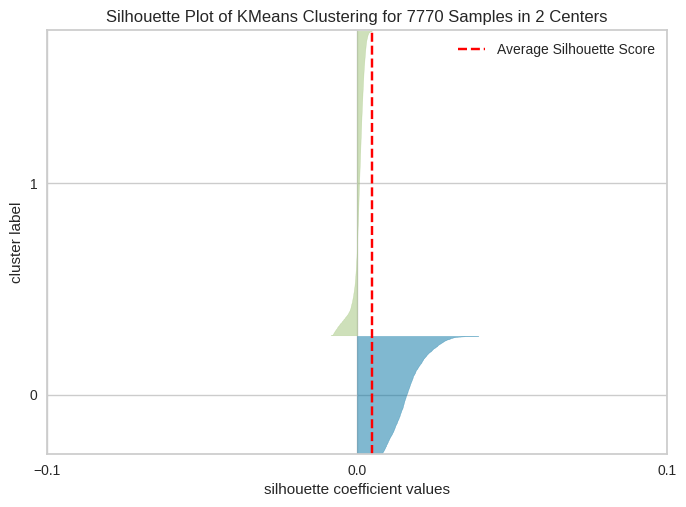

Silhouette score for 3 clusters: 0.0056764025992983615


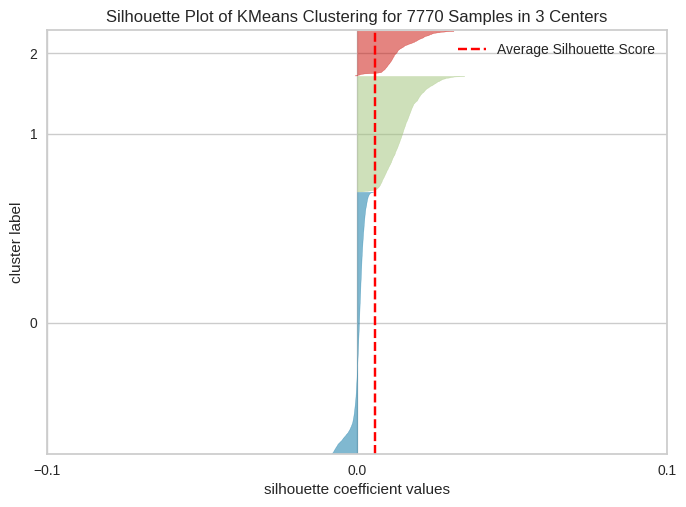

Silhouette score for 4 clusters: 0.006693807085522758


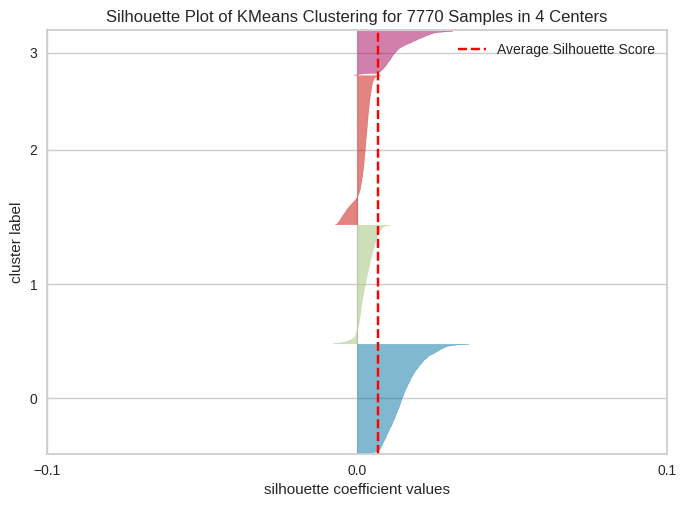

Silhouette score for 5 clusters: 0.000573801814762818


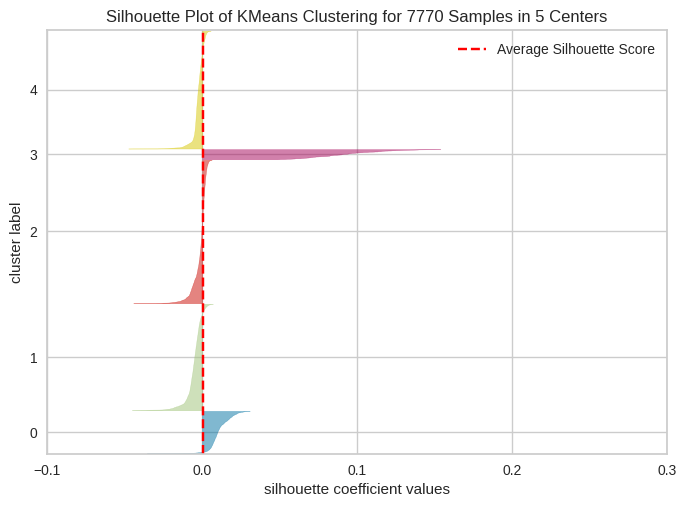

Silhouette score for 6 clusters: 0.0009858368003682605


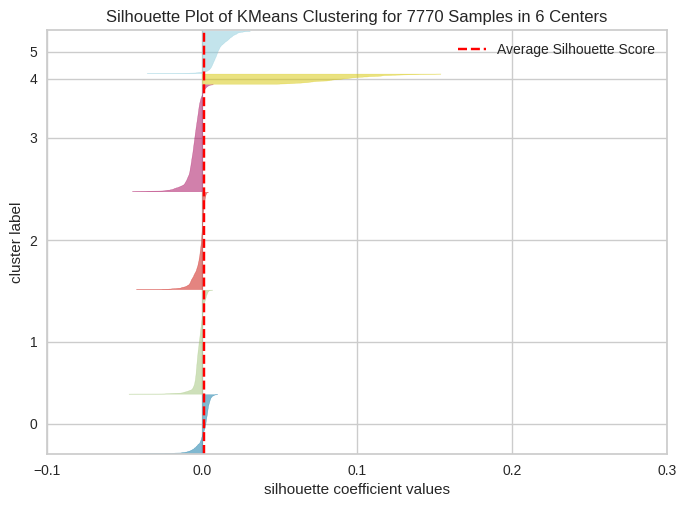

Silhouette score for 7 clusters: 0.0014670583906513364


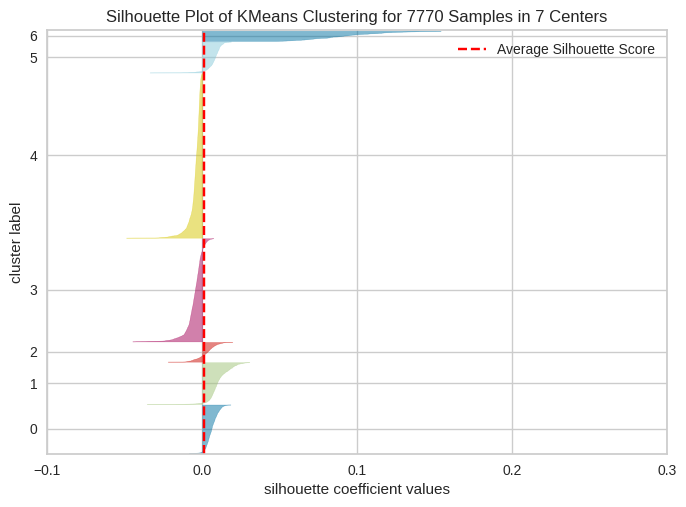

Silhouette score for 8 clusters: 0.0023745693100461437


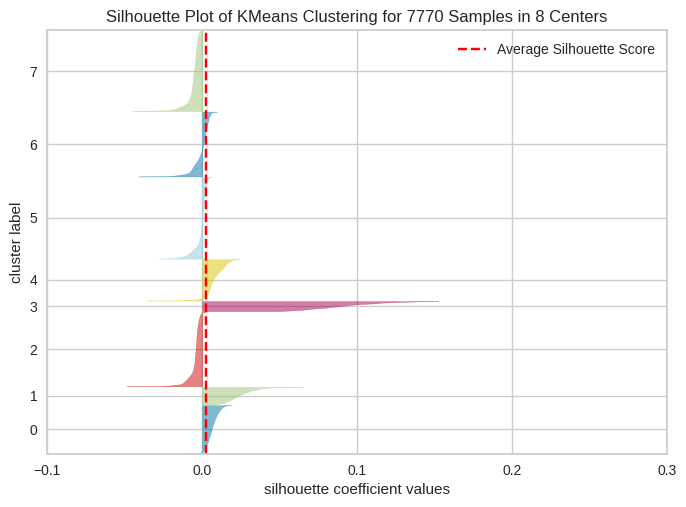

Silhouette score for 9 clusters: 0.0028336702100549256


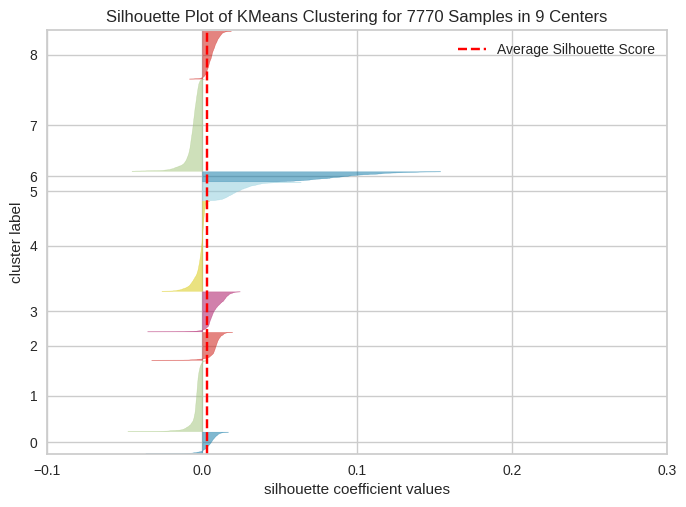

Silhouette score for 10 clusters: 0.0034889864729453143


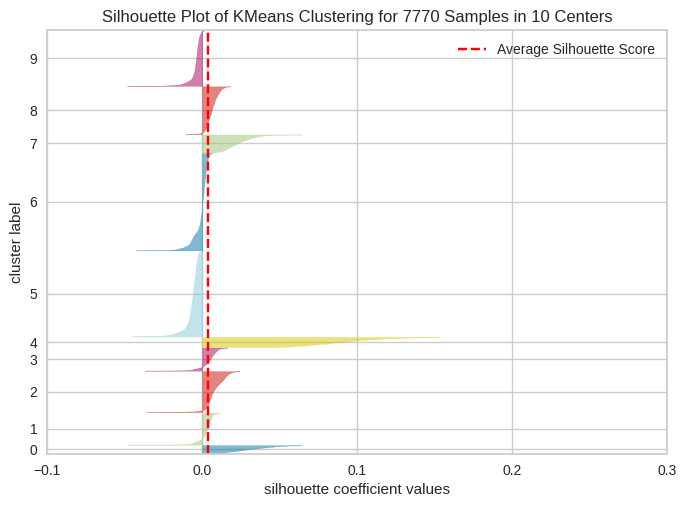

Silhouette score for 11 clusters: 0.004165564656142482


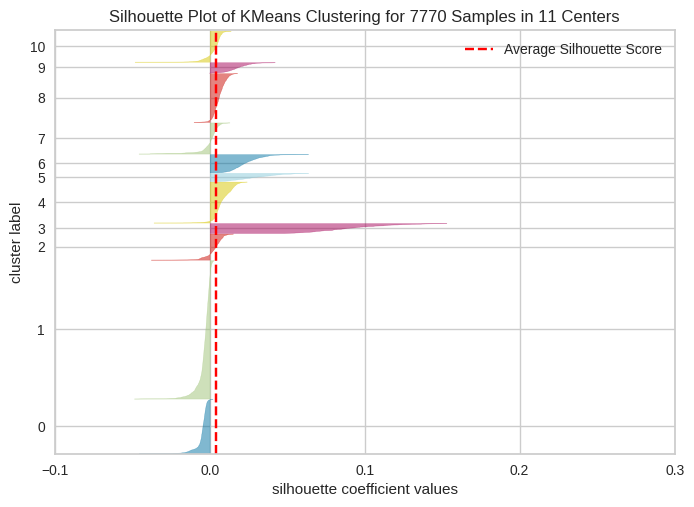

Silhouette score for 12 clusters: 0.0042811350698034375


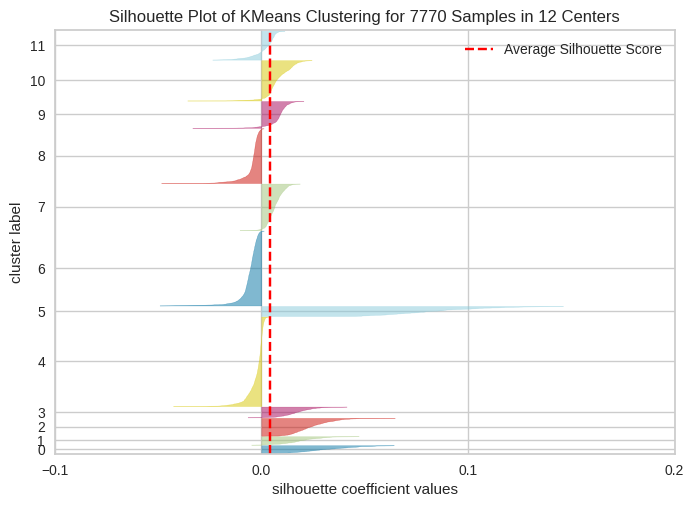

Silhouette score for 13 clusters: 0.005029816848938806


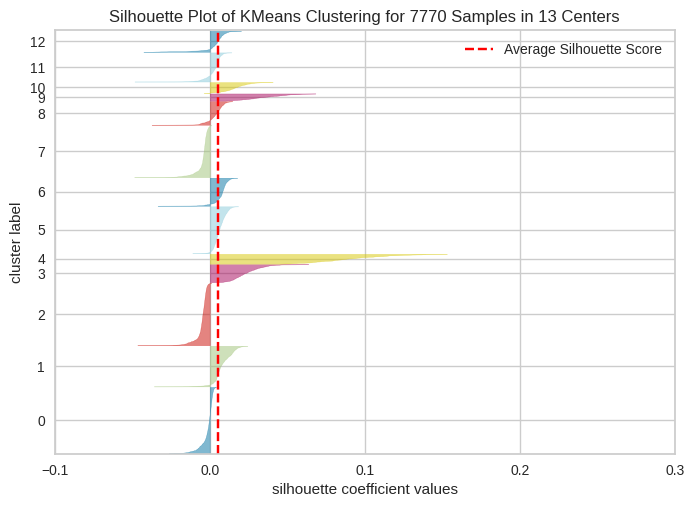

Silhouette score for 14 clusters: 0.005060755814956054


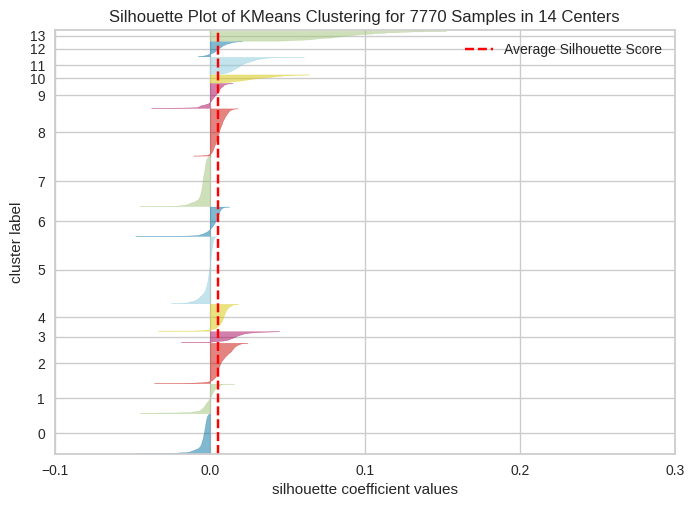

In [ ]:
silhouette_analysis(15)

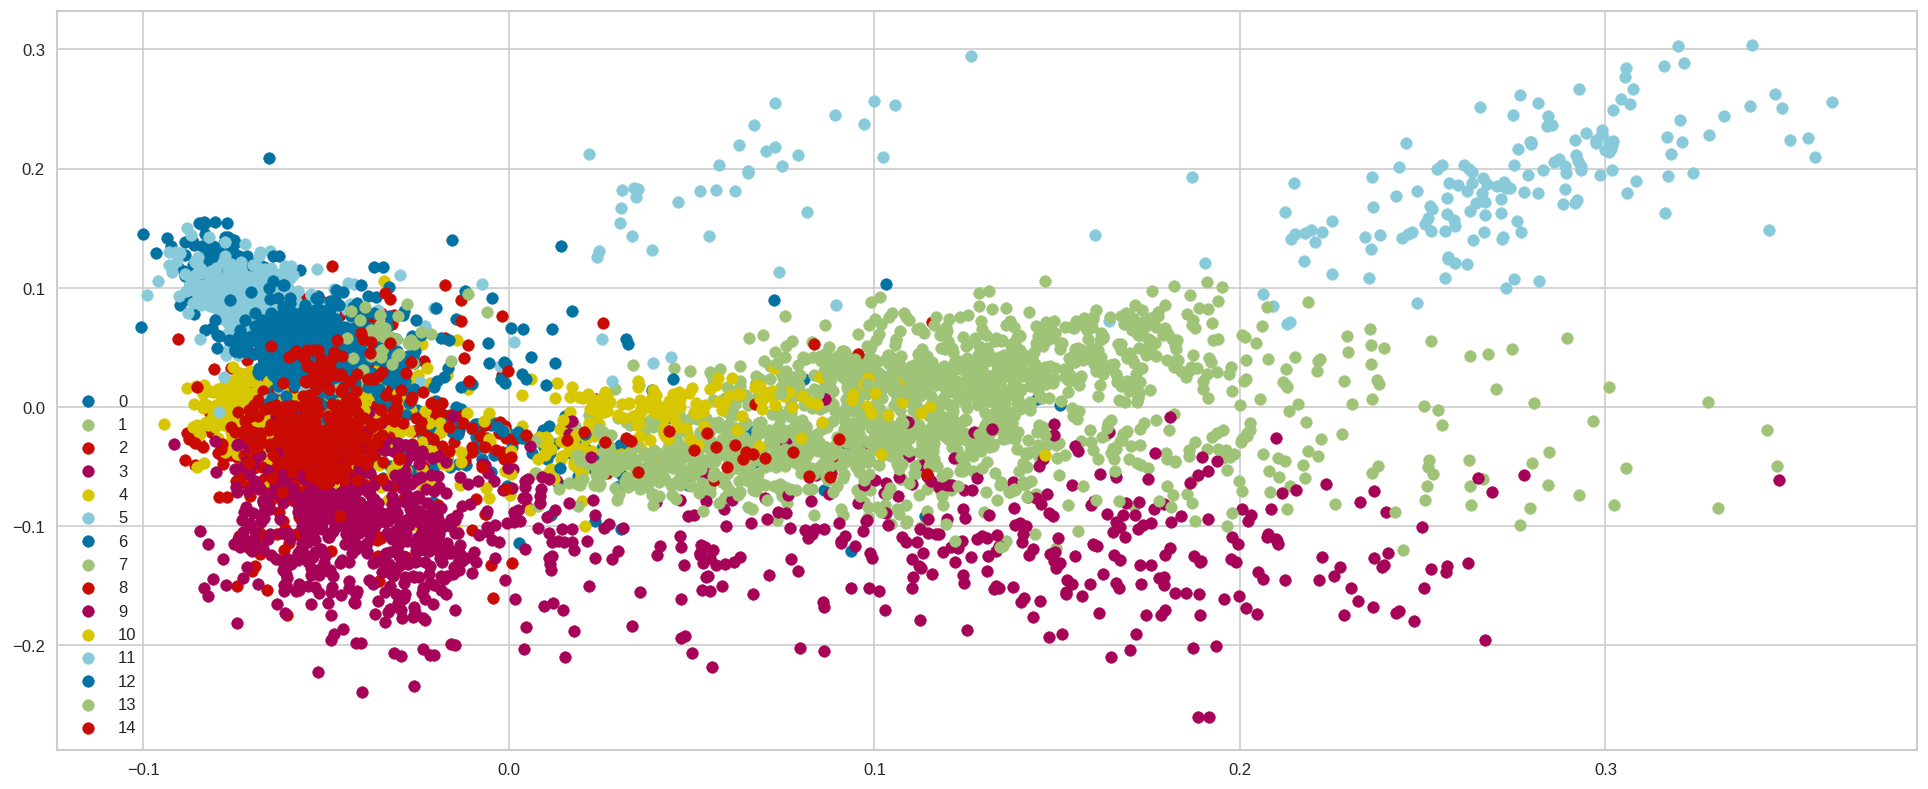

In [ ]:
plt.figure(figsize=(20, 8),dpi = 120)

kmeans = KMeans(n_clusters=15, random_state=9,init = 'k-means++')
kmeans.fit(X_transformed)
label = kmeans.fit_predict(X_transformed)
unique_labels = np.unique(label)

for i in unique_labels:
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label = i)

plt.legend()
plt.show()

In [ ]:
##add cluster value in dataframe
netflix_df['cluster_number'] = kmeans.labels_

In [ ]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  ...  \
0 2020-08-14          2020  TV-MA  4 Seasons  ...   
1 2016-12-23          2016  TV-MA     93 min  ...   
2 2018-12-20          2011      R     78 min  ...   
3 2017-11-16          2009  PG-13     80 min  ...   
4 2020-01-01          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  In a future where the elite inhabit an island ...       2020            8   
1  After a devastating earthquake hits Mexico Cit...       2016           12   
2  When an army recruit is found dead, his fellow...       2018           12   
3  In a postapocalyptic world, rag-doll robots hi...       2017           11   
4  A brilliant group of students become card-coun...       2020            1   

   duration_numeric  duration_type target_ages count  \
0               4.0        Seasons      Adults     1   
1              93.0            min      Adults     1   
2              78.0            min      Adults     1   
3              80.0            min       Teens     1   
4             123.0            min       Teens     1   

                                          clustering  \
0  Unknown João Miguel, Bianca Comparato, Michel ...   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...   
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...   
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...   

                                          Clean_Text cluster_number  
0  unknown joão miguel bianca comparato michel go...              1  
1  jorge michel grau demián bichir héctor bonilla...             12  
2  gilbert chan tedd chan stella chung henley hii...             12  
3  shane acker elijah wood john reilly jennifer c...             14  
4  robert luketic jim sturgess kevin spacey kate ...              4  

[5 rows x 21 columns]

In [ ]:
cluster_content_count = netflix_df['cluster_number'].value_counts().reset_index().rename(columns = {'index' : 'clusters','values' : 'cluster_number' })

print(cluster_content_count)

    cluster_number  count
0                4   1254
1                1   1051
2               12   1001
3                9    667
4               11    613
5                2    510
6               14    429
7                0    397
8                7    394
9                3    331
10               8    283
11               6    269
12              10    206
13               5    186
14              13    179


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_df[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()

Exploring Cluster 9
Looking for insights from type Movies/TV Shows


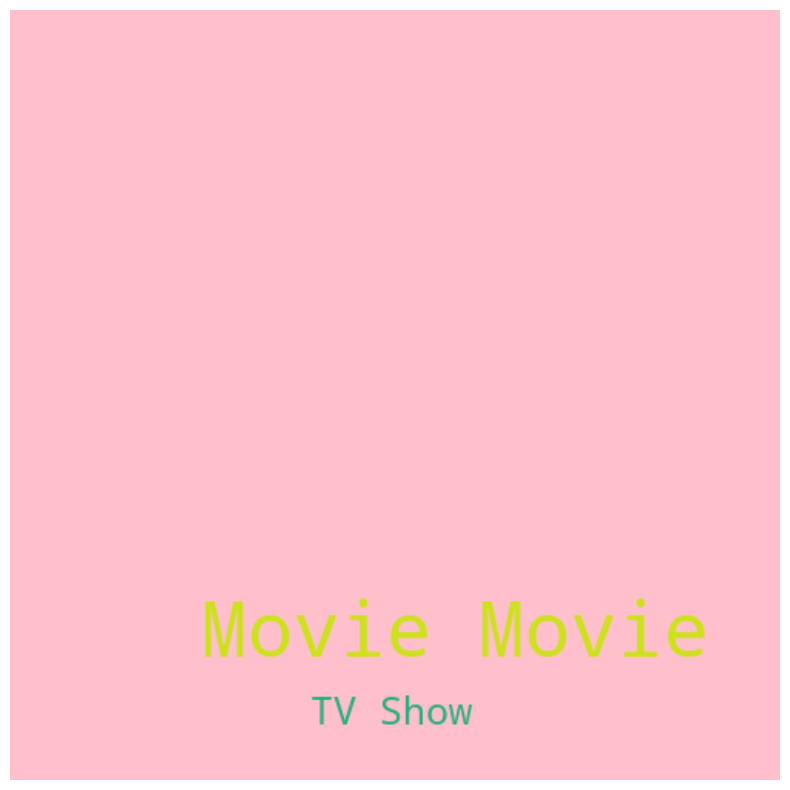

Looking for insights from title Movies/TV Shows


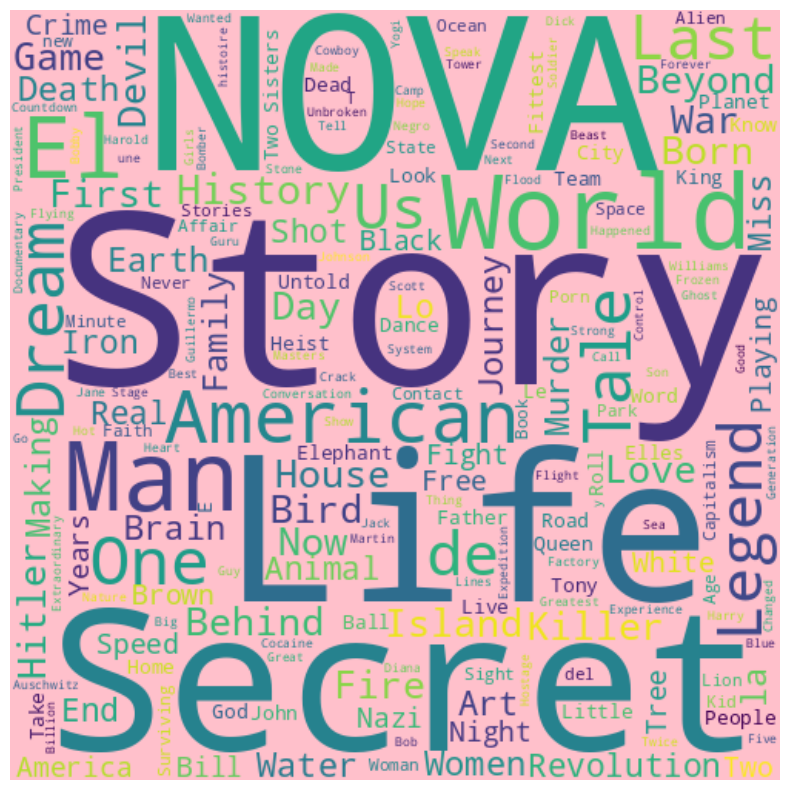

Looking for insights from country Movies/TV Shows


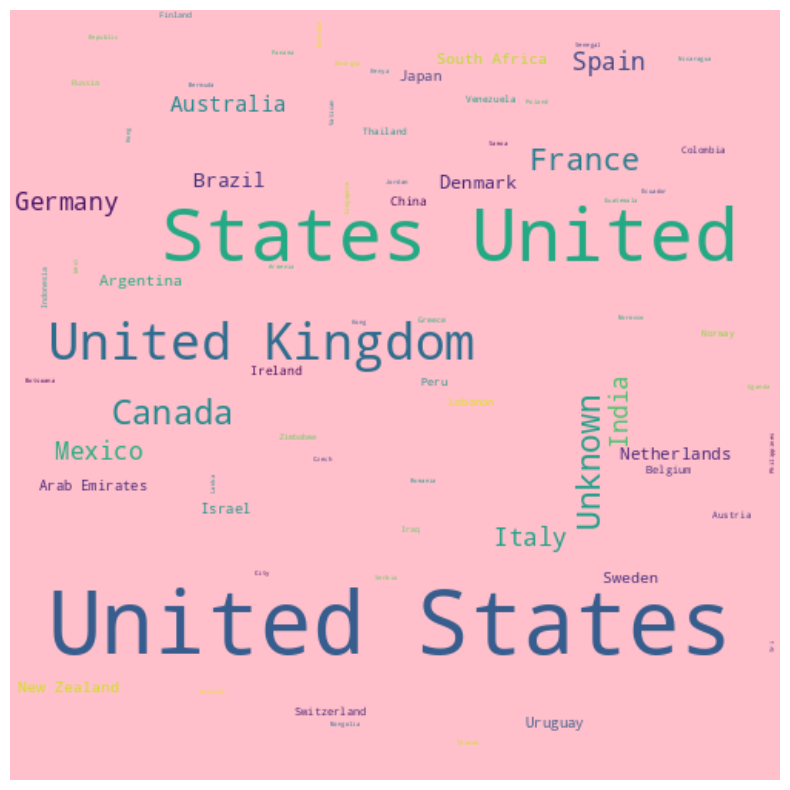

Looking for insights from rating Movies/TV Shows


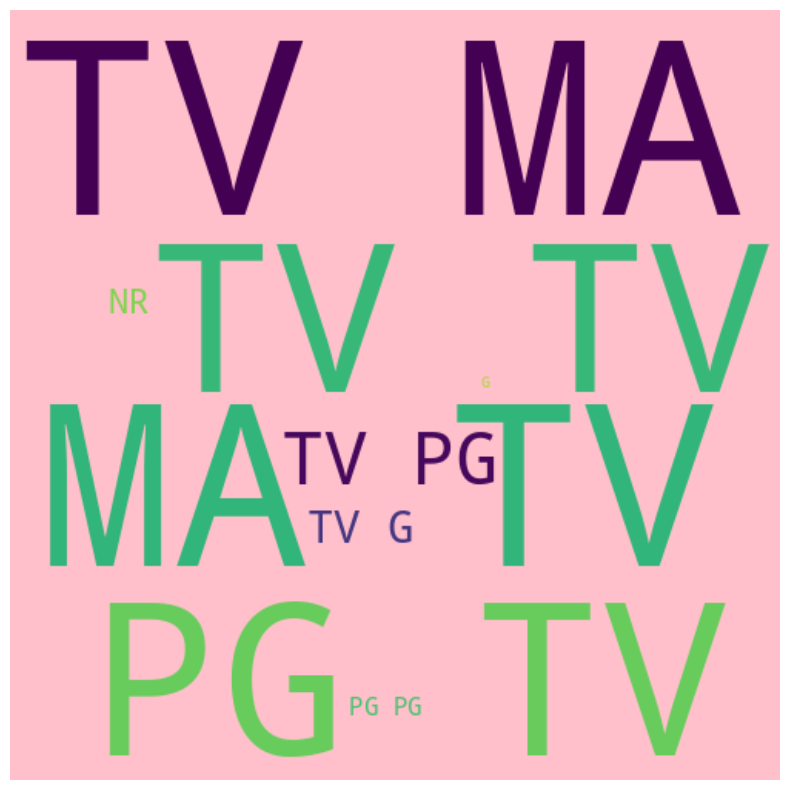

Looking for insights from listed_in Movies/TV Shows


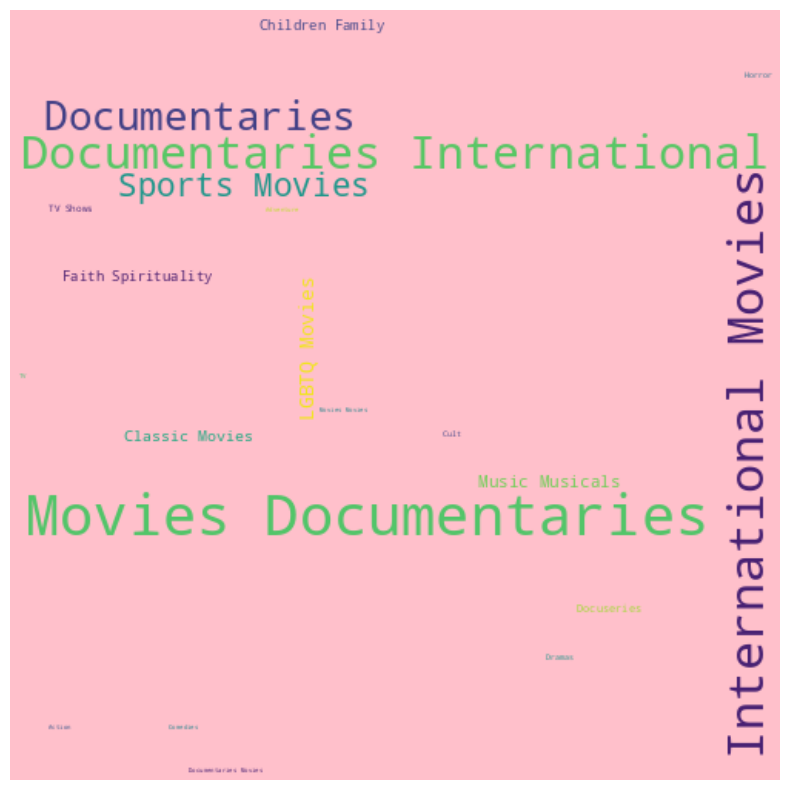

Looking for insights from description Movies/TV Shows


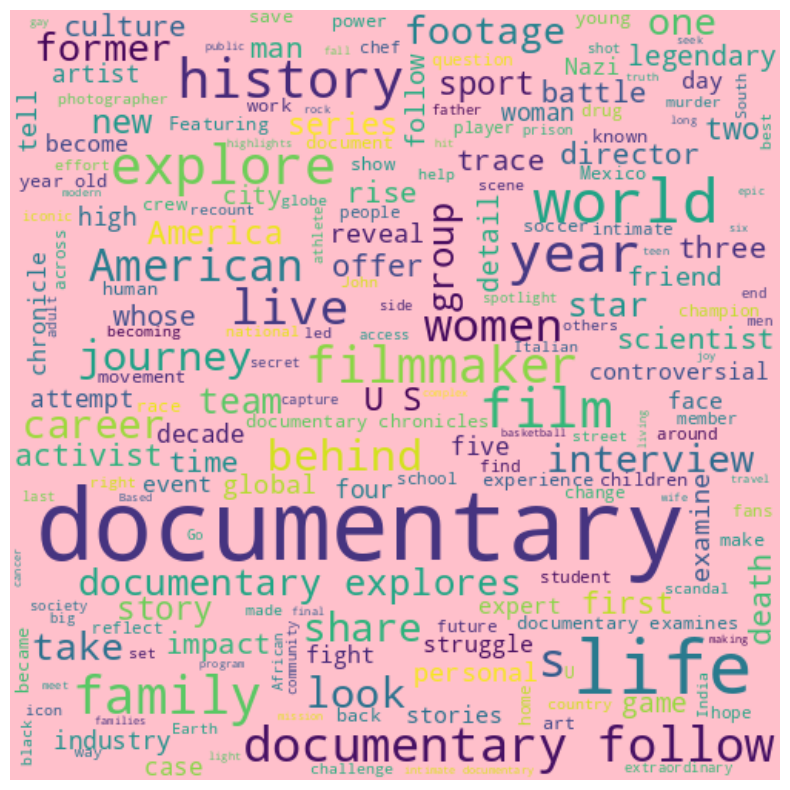

In [ ]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** - Movie & Tv shows

**Title** - Broadway,Remastered,Christmas ,Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA,PG-TV

**Listed_in** - Dramas International,Musical Dramas,Musicial Documentaries,Comedies International

**Description**- Documentary ,Music,One,Bad,Tour ,Love.

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


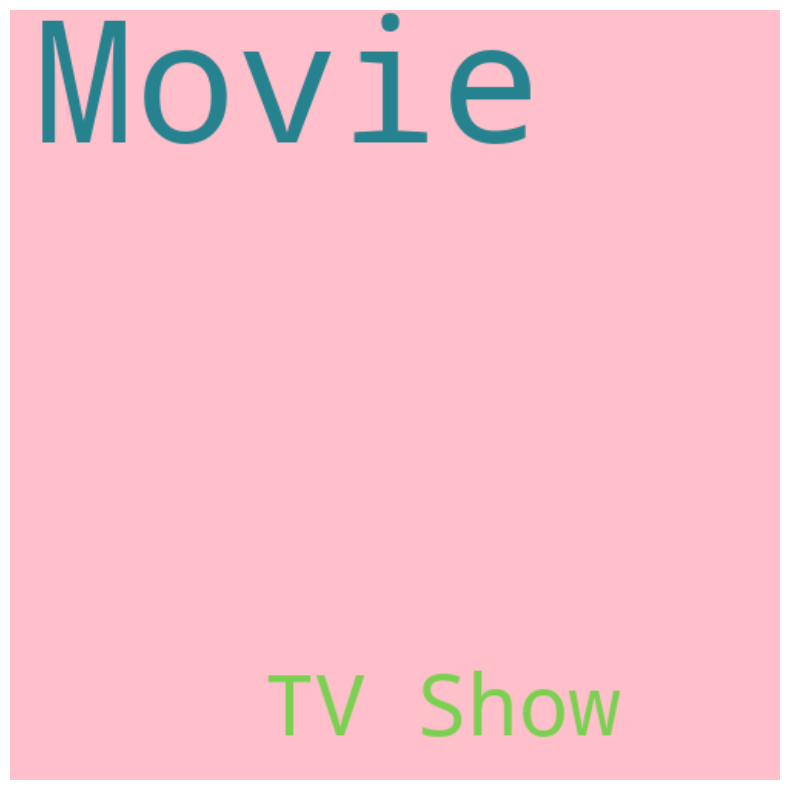

Looking for insights from title Movies/TV Shows


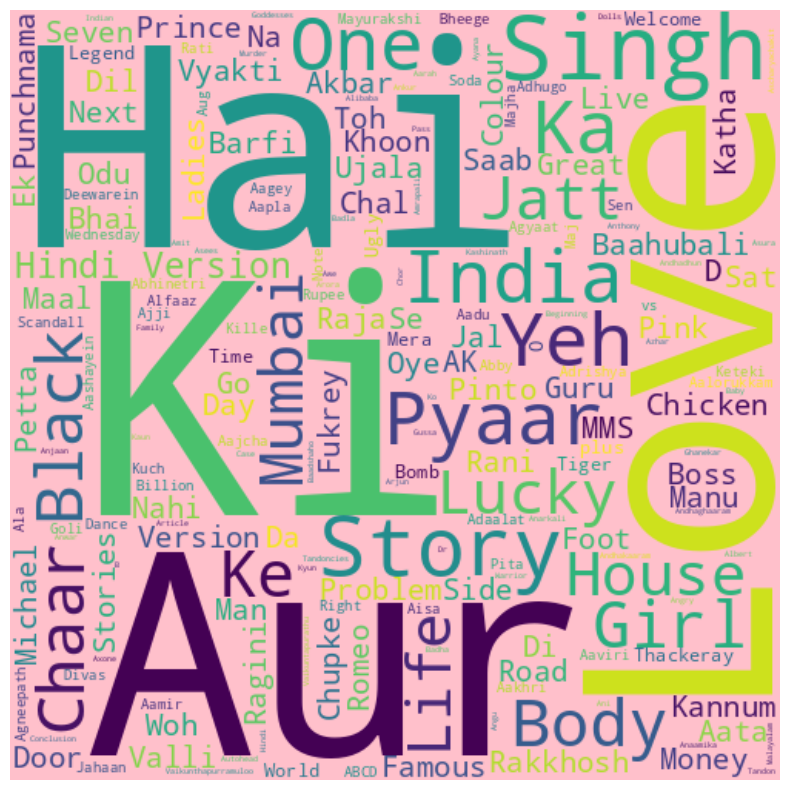

Looking for insights from country Movies/TV Shows


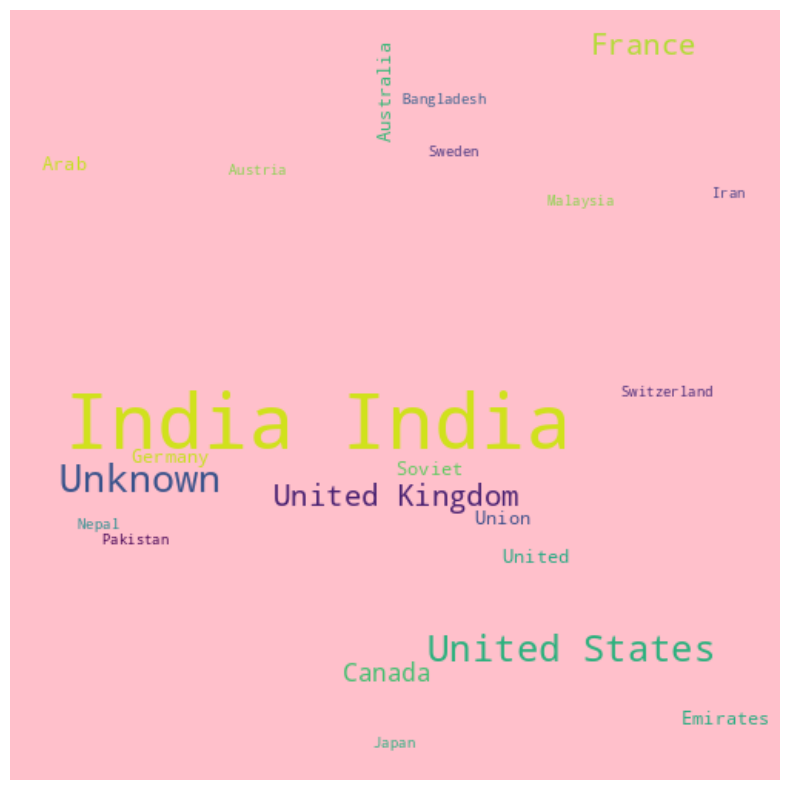

Looking for insights from rating Movies/TV Shows


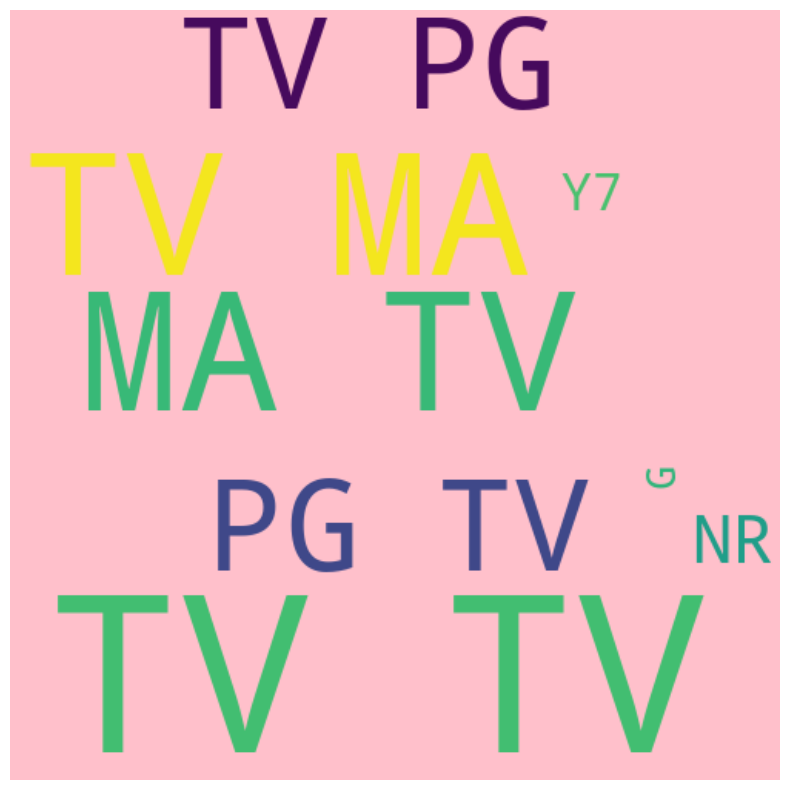

Looking for insights from listed_in Movies/TV Shows


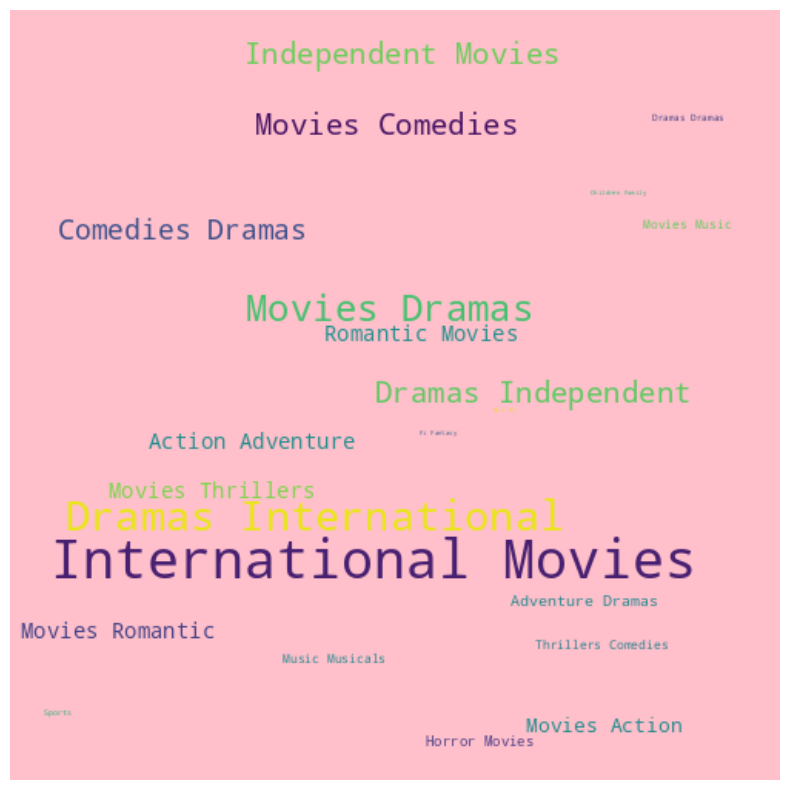

Looking for insights from description Movies/TV Shows


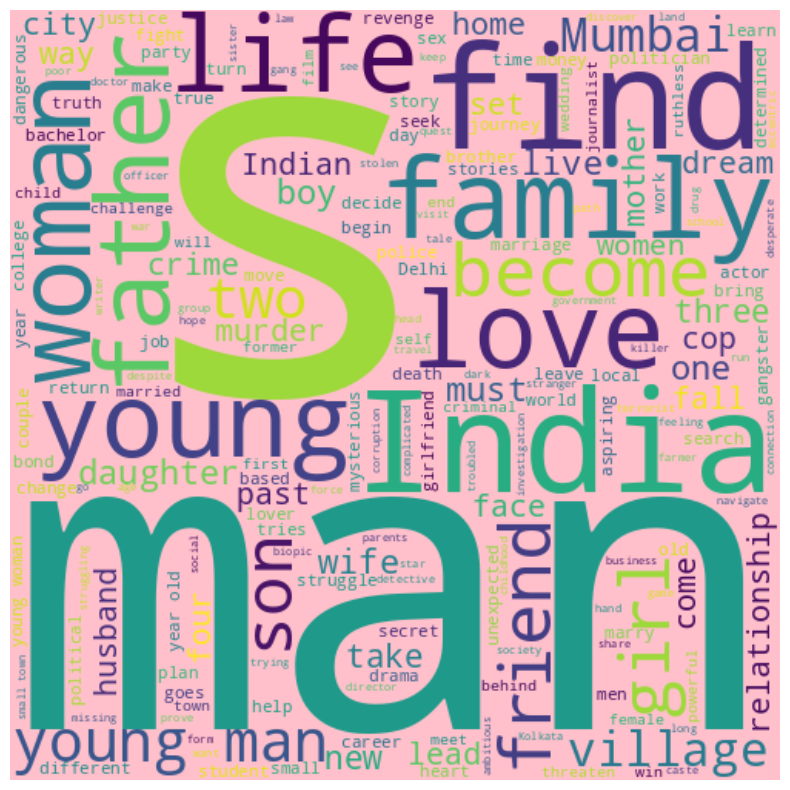

In [ ]:

word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type** - Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive, Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows

**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

## **Reommender System**

**A recommender system is a type of information filtering system that suggests items to users based on their preferences, interests, or past behavior. It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more.** The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.

**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tfidf =TfidfVectorizer(stop_words='english')
netflix_df['description'] = netflix_df['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

tfidf_matrix.shape

(7770, 17888)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.0582423 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09598644, 0.        ,
        0.        ],
       [0.0582423 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09598644, 0.        , ..., 1.        , 0.        ,
        0.02817753],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02817753, 0.        ,
        1.        ]])

In [ ]:
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_df['title'].iloc[movie_indices]

In [ ]:
netflix_df['title'][1:70]

1                      7:19
2                     23:59
3                         9
4                        21
5                        46
              ...          
65                  13 Sins
66                     13TH
68                14 Blades
69               14 Cameras
70    14 Minutes from Earth
Name: title, Length: 69, dtype: object

In [ ]:
get_recommendations('The Crown',cosine_sim)

3909                          Manje Bistre
3995                May the Devil Take You
1429    Club de Cuervos Presents: I, Potro
2582                           Half & Half
209           A New York Christmas Wedding
2485                     Good Morning Call
7302                                 Ujala
5289                         Rowdy Rathore
5813                                Stereo
5796                            Starred Up
Name: title, dtype: object

# **Conclusion**

**1-** It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

**2-** Most of these shows are released either at the end or the beginning of the year.

**3-** The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

**4-** When it comes to content ratings, TV-MA tops the charts, indicating that mature content is more popular on Netflix.

**5-** The value of k=15 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

**6-** Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***